# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и примыкающих населённых пунктах за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимого имущества. Наша задача — установить параметры. Это позволит автоматизировать процесс и отследить аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Одни вписаны пользователем, другие получены автоматически на базе картографических данных. К примеру, расстояние до центра города, аэропорта, ближайшего парка и водоёма.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Количество-фото" data-toc-modified-id="Количество-фото-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Количество фото</a></span></li><li><span><a href="#Цена-продажи" data-toc-modified-id="Цена-продажи-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Цена продажи</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Общая-площадь,-полезная-площадь,-площадь-кухни" data-toc-modified-id="Общая-площадь,-полезная-площадь,-площадь-кухни-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Общая площадь, полезная площадь, площадь кухни</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Этажность,-номер-этажа" data-toc-modified-id="Этажность,-номер-этажа-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Этажность, номер этажа</a></span></li><li><span><a href="#Апартаменты" data-toc-modified-id="Апартаменты-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Апартаменты</a></span></li><li><span><a href="#Балконы" data-toc-modified-id="Балконы-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Балконы</a></span></li><li><span><a href="#Населенный-пункт" data-toc-modified-id="Населенный-пункт-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Населенный пункт</a></span></li><li><span><a href="#Дата-размещения" data-toc-modified-id="Дата-размещения-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Дата размещения</a></span></li><li><span><a href="#Срок-размещения" data-toc-modified-id="Срок-размещения-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Срок размещения</a></span></li><li><span><a href="#Расстояние-до-центра" data-toc-modified-id="Расстояние-до-центра-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Расстояние до центра</a></span></li><li><span><a href="#Ближайшие-объекты" data-toc-modified-id="Ближайшие-объекты-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Ближайшие объекты</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общие-параметры" data-toc-modified-id="Общие-параметры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общие параметры</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Цена" data-toc-modified-id="Цена-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Время-продажи" data-toc-modified-id="Время-продажи-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Факторы,-влияющие-на-стоимость-объекта" data-toc-modified-id="Факторы,-влияющие-на-стоимость-объекта-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы, влияющие на стоимость объекта</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Удаленность-от-центра" data-toc-modified-id="Удаленность-от-центра-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Удаленность от центра</a></span></li><li><span><a href="#Этаж" data-toc-modified-id="Этаж-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Этаж</a></span></li><li><span><a href="#Дата-размещения" data-toc-modified-id="Дата-размещения-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Дата размещения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Стоимость-жилья-в-популярных-населенных-пунктах" data-toc-modified-id="Стоимость-жилья-в-популярных-населенных-пунктах-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Стоимость жилья в популярных населенных пунктах</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Сегментация:-выделение-городского-центра" data-toc-modified-id="Сегментация:-выделение-городского-центра-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Сегментация: выделение городского центра</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Сегментация:-исследование-центральной-зоны" data-toc-modified-id="Сегментация:-исследование-центральной-зоны-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Сегментация: исследование центральной зоны</a></span><ul class="toc-item"><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Разброс-цен" data-toc-modified-id="Разброс-цен-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>Разброс цен</a></span></li><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-4.6.3"><span class="toc-item-num">4.6.3&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-4.6.4"><span class="toc-item-num">4.6.4&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Удаленность-от-центра" data-toc-modified-id="Удаленность-от-центра-4.6.5"><span class="toc-item-num">4.6.5&nbsp;&nbsp;</span>Удаленность от центра</a></span></li><li><span><a href="#Этаж" data-toc-modified-id="Этаж-4.6.6"><span class="toc-item-num">4.6.6&nbsp;&nbsp;</span>Этаж</a></span></li><li><span><a href="#Дата-размещения" data-toc-modified-id="Дата-размещения-4.6.7"><span class="toc-item-num">4.6.7&nbsp;&nbsp;</span>Дата размещения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6.8"><span class="toc-item-num">4.6.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Рекомендации-по-заполнению-данных:" data-toc-modified-id="Рекомендации-по-заполнению-данных:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Рекомендации по заполнению данных:</a></span></li></ul></li></ul></div>

## Изучение данных из файла

In [1]:
# Импортируем необходимые модули:
import pandas as pd
import matplotlib.pyplot as plt
# Настроим отображение больших чисел на графиках:
plt.rcParams["axes.formatter.limits"] = (-5, 12)

Выведем общую информацию и начало таблицы:

In [2]:
df = pd.read_csv ('/datasets/real_estate_data.csv',sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
pd.set_option('display.max_columns', 30)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Взглянем также на последние строки и случайную выборку 10 строк из датасета:

In [4]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.sample (n=10, random_state=177013)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
593,20,4200000.0,38.3,2019-04-16T00:00:00,1,2.60,16.0,19.8,10,NaN,False,False,10.1,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13602,3,8200000.0,104.0,2019-01-23T00:00:00,3,2.95,4.0,68.5,4,NaN,False,False,14.4,2.0,Сестрорецк,54331.0,35394.0,0.0,NaN,0.0,NaN,NaN
22418,17,6250000.0,54.3,2019-04-03T00:00:00,2,NaN,18.0,30.8,18,NaN,False,False,10.2,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,26.0
23641,3,3100000.0,30.0,2018-03-28T00:00:00,1,2.50,5.0,17.0,5,NaN,False,False,5.0,NaN,Колпино,24056.0,29843.0,0.0,NaN,0.0,NaN,10.0
2828,18,15700000.0,93.0,2017-09-20T00:00:00,3,2.80,22.0,61.0,19,NaN,False,False,12.0,1.0,Санкт-Петербург,44382.0,16921.0,0.0,NaN,0.0,NaN,300.0
11254,4,2710000.0,34.0,2017-09-18T00:00:00,1,2.80,5.0,18.0,4,NaN,False,False,8.0,0.0,посёлок Парголово,53042.0,22968.0,0.0,NaN,3.0,282.0,45.0
14527,12,4777000.0,45.0,2018-10-31T00:00:00,2,NaN,5.0,27.3,1,NaN,False,False,7.2,NaN,Санкт-Петербург,48402.0,14962.0,1.0,590.0,1.0,857.0,100.0
15529,2,4080000.0,61.0,2018-03-27T00:00:00,2,NaN,25.0,38.8,10,NaN,False,False,9.2,1.0,посёлок Шушары,13931.0,19717.0,0.0,NaN,1.0,582.0,59.0
4253,0,6690000.0,66.0,2018-11-14T00:00:00,3,2.58,14.0,43.0,10,NaN,False,False,NaN,NaN,Санкт-Петербург,12835.0,15427.0,0.0,NaN,0.0,NaN,72.0
8163,6,4600000.0,39.6,2014-12-14T00:00:00,1,2.75,14.0,21.0,8,False,False,False,10.0,2.0,Санкт-Петербург,41570.0,11703.0,1.0,493.0,0.0,NaN,649.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Предоставлены данные о 23699 объектах недвижимости по 22 признакам (в т.ч. 17 количественным, 1 типа дата/время и 4 категориям). Заголовки колонок удовлетворительны, отдельные случаи mixed case в заголовках несущественны.

При этом лишь 8 столбцов не имеют очевидных пропусков, предобработка данных потребует внимания.

Сводка по долям пропущенных значений:

In [7]:
df.isnull().mean().apply("{:.1%}".format)

total_images             0.0%
last_price               0.0%
total_area               0.0%
first_day_exposition     0.0%
rooms                    0.0%
ceiling_height          38.8%
floors_total             0.4%
living_area              8.0%
floor                    0.0%
is_apartment            88.3%
studio                   0.0%
open_plan                0.0%
kitchen_area             9.6%
balcony                 48.6%
locality_name            0.2%
airports_nearest        23.4%
cityCenters_nearest     23.3%
parks_around3000        23.3%
parks_nearest           65.9%
ponds_around3000        23.3%
ponds_nearest           61.6%
days_exposition         13.4%
dtype: object

Столбец `first_day_exposition` потребует приведения к типу дата/время.
Столбцы `last_price`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `ponds_nearest`, `days_exposition` используются как целочисленные, но имют тип float. Их целесообразно привести к целочисленному типу. То же скорее всего можно сказать о столбцах `airports_nearest`, `cityCenters_nearest` и `parks_nearest`.
Столбец `is_apartment` имеет больше всего пропусков и, по-видимому, несоответствующий тип.

## Предобработка данных

Прежде всего проверим таблицу на очевидные дубликаты:

In [8]:
df.duplicated().sum()

0

Явно дублированных строк не наблюдается.

Проблем с данными даже на обзорном этапе выявлено довольно много, так что пройдемся по столбцам внимательно.

### Количество фото

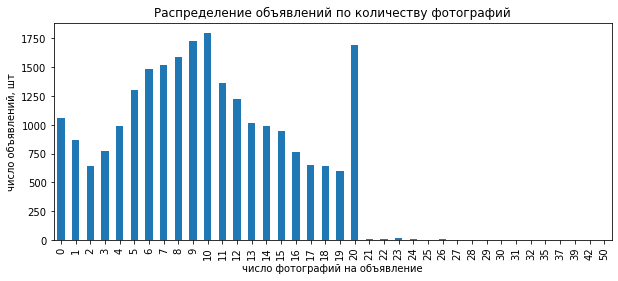

In [9]:
# Поскольку в value_counts() порядка 50 значений, сподручней представить его сразу диаграммой:
df['total_images'].value_counts().sort_index().plot(kind='bar', figsize=(10,4), title='Распределение объявлений по количеству фотографий').set(xlabel='число фотографий на объявление', ylabel='число объявлений, шт');
# То же самое можно вывести через:
#df['total_images'].hist(bins=50, figsize=(10,3))
# Но так чуть более наглядно.

Почти нормальное распределение, большое количество объявлений с числом фотографий 0 или 1 вполне ожидаемо и не требует пояснений.
Несколько необычно большое количество объявлений с 20 фотографиями, причем это не максимум.

In [10]:
df.query('total_images == 20').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.00,5,NaN,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
27,20,7100000.0,70.00,2017-05-12T00:00:00,3,2.60,17.0,49.00,11,NaN,False,False,9.20,0.0,Санкт-Петербург,29197.0,11456.0,2.0,452.0,1.0,779.0,151.0


На первый взгляд эти строки ничего не связывает, дубликатов в таблице тоже нет, но будем иметь эту аномалию в виду. Возможно, сервис был ограничен 20 фотографиями до недавнего обновления, или в какой-то момент имел место баг, когда счетчик не уменьшался, если существующие фотографии заменяли новыми.

### Цена продажи

In [11]:
df['last_price'].describe().apply("{:.0f}".format)

count        23699
mean       6541549
std       10887013
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: object

Столбец `last_price` не имеет нулевых или отрицательных значений, хотя содержит как подозрительно маленькие (12 тысяч), так и баснословно большие (763 миллиона) ценники. Разумно, впрочем, будет не пытаться подавить их вручную, а отбросить на этапе исследования как выбросы.

Приведем столбец к целому типу:

In [12]:
df['last_price'] = df['last_price'].astype(int)

### Число комнат

In [13]:
df['rooms'].value_counts().sort_index()

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

В 197 строках число комнат равно нулю, но, возможно, речь идет о квартирах без отдельных помещений, т.е. студиях и открытой планировке, проверим это:

In [14]:
len (df.query('rooms == 0 and (studio == True or open_plan == True)'))

197

Действительно, все нулевые значения относятся к таким объектам.

In [15]:
df.query('studio == True')['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

In [16]:
df.query('open_plan == True')['rooms'].value_counts()

0    59
1     3
3     2
5     1
4     1
2     1
Name: rooms, dtype: int64

А вот обраное неверно, часть студий маркирована как однокомнатные, квартиры открытой планировки маркируют как попало, но все же большинство - нулем. Примем, что большинству так удобнее, и промаркируем нулями все такие объекты:

In [17]:
df.loc[(df['open_plan']==True) | (df['studio']==True), 'rooms'] = 0

Помимо этого, присутствуют строки с очень большим числом комнат, но их немного. Попробуем оценить, правдоподобно ли соответствие количества комнат и заявленной жилплощади:

In [18]:
rooms_grouping = df.groupby('rooms')
rooms_grouping_median_area = rooms_grouping['living_area'].agg(['count','min','max','median'])
rooms_grouping_median_area

,count,min,max,median
rooms,,,,
0,201,2.0,71.3,18.000
1,7374,3.0,60.0,17.600
2,7295,2.0,99.5,30.500
3,5364,3.0,170.8,45.000
4,1088,5.4,250.0,63.550
5,292,23.6,301.5,91.785
6,99,51.0,300.0,123.900
7,53,57.4,347.5,145.000
8,12,107.0,260.0,161.000


Среди строк с большим числом комнат явно абсурдных сочетаний нет, поэтому будем считать их корректными.

### Общая площадь, полезная площадь, площадь кухни

In [19]:
df['total_area'].describe().apply("{:.1f}".format)

count    23699.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.9
max        900.0
Name: total_area, dtype: object

Есть очень большие площади, но нет откровенно некорректных.

In [20]:
df['kitchen_area'].describe().apply("{:.1f}".format)

count    21421.0
mean        10.6
std          5.9
min          1.3
25%          7.0
50%          9.1
75%         12.0
max        112.0
Name: kitchen_area, dtype: object

In [21]:
df['living_area'].describe().apply("{:.1f}".format)

count    21796.0
mean        34.5
std         22.0
min          2.0
25%         18.6
50%         30.0
75%         42.3
max        409.7
Name: living_area, dtype: object

Кухни действительно бывают совсем крошечные, но жилплощадь всего в 2 кв. м выглядит странно. Взглянем поближе:

In [22]:
df.query ('living_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000,41.0,2017-07-02T00:00:00,1,NaN,17.0,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000,52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
21758,0,2330000,23.0,2018-01-01T00:00:00,0,NaN,24.0,2.0,22,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
23574,14,64990000,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Какой-то закономерности в возникновении этой ошибки не видно, поэтому целесообразнее заняться аномалиями площадей на этапе исследования.

Помимо того, 8% значений для `living_area` и около 10% для `kitchen_area` пропущено. Интересно, какова зависимость этих параметров от общей площади?

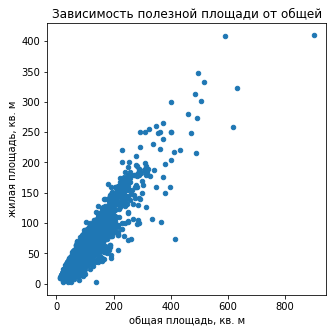

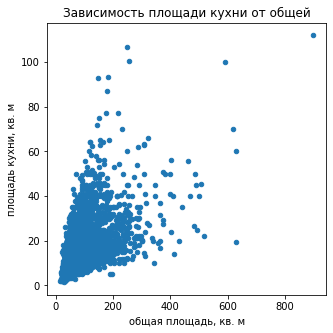

In [23]:
df.plot (x='total_area', y='living_area', kind='scatter', figsize=(5,5), title='Зависимость полезной площади от общей').set(xlabel='общая площадь, кв. м', ylabel='жилая площадь, кв. м');
df.plot (x='total_area', y='kitchen_area', kind='scatter', figsize=(5,5), title='Зависимость площади кухни от общей').set(xlabel='общая площадь, кв. м', ylabel='площадь кухни, кв. м');

Для `living_area` зависимость близка к линейной, теоретически мы могли бы заполнить недостающие значения исходя из среднего соотношения. Для `kitchen_area` разброс куда шире, но при желании и его можно усреднить. Однако одной из наших задач будет внесение в таблицу реального соотношения этих параметров для каждой строки, потому пока оставим их как есть.

### Высота потолков

In [24]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

75% значений лежат в пределах 2,8 м, что правдоподобно. Рассмотрим поподробнее очень большие значения до 100 м:

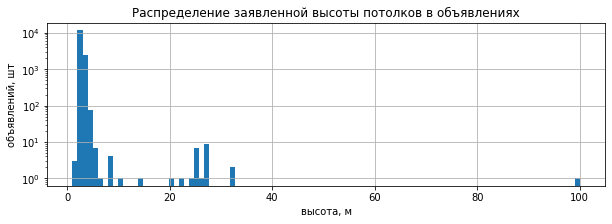

In [25]:
# Построим логарифмическую гистограмму (линейная будет не очень наглядной).
# Она покажет нам, насколько часто встречаются аномальные высоты:
df['ceiling_height'].hist(figsize=(10,3), bins=100, log=True).set(title='Распределение заявленной высоты потолков в объявлениях', xlabel='высота, м', ylabel='объявлений, шт');

Из распределения можно предположить, что значения вида 2.0 иногда распознавались как 20 и т.д.

Помимо этого присутствуют неоднозначные значения типа 8 и 100 м.

Обработаем значения от 10 м:

In [26]:
# Поделим значения свыше 10м на 10:
def fix_height (height):
    try:
        if height >= 10 and height < 100:
            return height/10
        else:
            return height
    except:
        print ('На входе не число!')
        return 2.8

df['ceiling_height'] = df['ceiling_height'].apply(fix_height)

Теперь посмотрим на подозрительно малые высоты:

In [27]:
df.query('ceiling_height < 2.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
15061,19,5600000,56.4,2018-05-11T00:00:00,2,1.40,14.0,32.4,5,NaN,False,False,9.10,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
16934,5,4100000,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22309,20,5300000,45.0,2017-09-30T00:00:00,1,1.03,16.0,15.5,15,NaN,False,False,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22590,16,6000000,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Почти все строки выглядят как обычные квартиры в многоэтажках. Согласно СНиП высота потолка в них не должна быть меньше 2,4 м. 1.75 - вероятно, неправильно записанное 2,75, насчет остальных можно только догадываться. Лишь первая строка среза - двухэтажный дом, но тем не менее высота 1,2 м нереалистична, и это первый этаж, не мансарда (где, возможно, высоту могли бы отмерить по боковой стене).

In [28]:
df.query('ceiling_height >= 8 and ceiling_height <=10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15743,14,5600000,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,False,False,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,False,False,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0


С виду самые обычные жилые дома, потолок в 8 м выглядит явной ошибкой.

Вдобавок к этим 8 строкам не забываем, что почти 40% значений в этом столбце пропущено. Можно ли заполнить их на основании других данных из таблицы? Сколько-нибудь уместным выглядит только медиана по этажности, ведь как правило, разные серии домов имеют определенное число этажей. Оценим полезность этих данных:

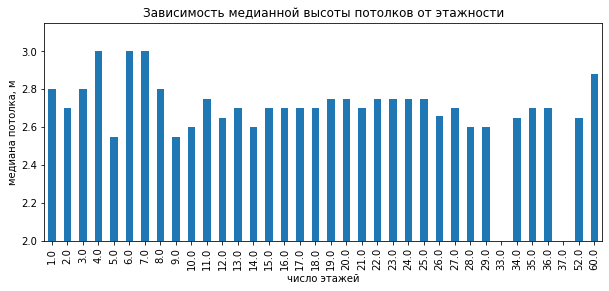

In [29]:
# Сгруппируем таблицу по этажности:
floors_total_grouping = df.groupby('floors_total')
# Вычислим медианы по группам:
floors_total_grouping_median_height = floors_total_grouping['ceiling_height'].median()
floors_total_grouping_median_height.plot (kind='bar', ylim=2, figsize=(10,4), title='Зависимость медианной высоты потолков от этажности').set(xlabel='число этажей', ylabel='медиана потолка, м');

Разница между хрущевкой и сталинкой налицо, а вот для многоэтажных зданий кое-где маловато данных.

Воспользуемся медианой по группе этажности там, где это возможно:

In [30]:
df['ceiling_height'] = df['ceiling_height'].fillna(floors_total_grouping['ceiling_height'].transform('median'))
print ('Осталось пустых ячеек:', df['ceiling_height'].isna().sum())

Осталось пустых ячеек: 78


В остальных случаях воспользуемся общей медианой по столбцу:

In [31]:
df.loc[(df['ceiling_height'].isnull())| (df['ceiling_height']<2.0) | (df['ceiling_height'] == 8) | (df['ceiling_height'] == 8.3), 'ceiling_height']= df['ceiling_height'].median()
print ('Осталось пустых ячеек:',df['ceiling_height'].isna().sum())

Осталось пустых ячеек: 0


Ну и напоследок рассмотрим строку с высотой 100:

In [32]:
df.query('ceiling_height == 100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Судя по описанию, тут натуральный пентхаус, быть может, 100 символизирует отсутствие потолка вовсе? Сохраним уникальное значение.

### Этажность, номер этажа

In [33]:
df['floors_total'].value_counts().sort_index()

1.0       25
2.0      383
3.0      668
4.0     1200
5.0     5788
6.0      914
7.0      592
8.0      390
9.0     3761
10.0    1174
11.0     203
12.0    1362
13.0     229
14.0     553
15.0     365
16.0    1376
17.0     833
18.0     505
19.0     339
20.0     271
21.0     158
22.0     286
23.0     352
24.0     469
25.0    1075
26.0     124
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64

Значения выглядят корректно. Есть небольшое количество пропусков (0,4%), но, к сожалению, у нас нет оснований заполнить их чем-либо. Тем не менее, заполним пустые значения нулями для приведения к целому типу:

In [34]:
df['floors_total'] = df['floors_total'].fillna(0).astype(int)

Теперь взглянем на номера этажей:

In [35]:
df['floor'].value_counts().sort_index()

1     2917
2     3368
3     3073
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
11     523
12     526
13     379
14     337
15     343
16     315
17     227
18     178
19     147
20     110
21     125
22     113
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

In [36]:
len (df.query('(floor > floors_total) and (floors_total > 0)'))

0

Все технически корректно, без странностей и пропусков.

### Апартаменты

In [37]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Здесь много пропусков, но поскольку апартаменты - редкая новомодная вещь, заполнить пропуски значением `False` будет совершенно разумно. Не забудем привести столбец к правильному типу:

In [38]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype(bool)

### Балконы

In [39]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Разумным выглядит предположение, что если о наличии балкона ничего не сказано, то его нет. Заполним пустые значения нулями и приведем столбец к целому типу.

In [40]:
df['balcony'] = df['balcony'].fillna(0).astype(int)

### Населенный пункт

In [41]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Дубликаты вида "Мурино" - "поселок Мурино" - "посёлок Мурино" не очень радуют, так что немного отфильтруем данные и запишем их в отдельный столбец:

In [42]:
def simplify_locality (name):
    result=''
    try:
        # Разобьем строку по пробелам:
        for word in name.split():
            # Начиная с первого слова с большой буквы, добавляем слова к результату, предварительно заменив все ё на е.
            # В принципе, это даже избыточно, в именах собственных в данном случае нет ё.
            if word[0].isupper() or result:
                if result:
                    result+=' '
                result+=word.replace('ё','е').replace('Ё','Е')
    except:
        result='неизвестно'
    finally:
        return result

df['simplified_locality'] = df['locality_name'].apply(simplify_locality)
df['simplified_locality'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [43]:
print ('Было уникальных значений:', len(df['locality_name'].unique()), '\nСтало:', len(df['simplified_locality'].unique()))

Было уникальных значений: 365 
Стало: 306


In [44]:
len(df.query('simplified_locality == "неизвестно"'))

49

В 49 строках не указан населеннный пункт, меж тем он важен для исследования. Попробуем прикинуть минмальный радиус города по расстоянию от центра:

In [45]:
# Посмотрим на ближайшие квартиры за городской чертой:
df.query('simplified_locality != "Санкт-Петербург" and simplified_locality != "неизвестно"').sort_values(by='cityCenters_nearest').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,simplified_locality
18432,2,4300000,77.00,2017-05-26T00:00:00,3,2.65,25,46.0,15,False,False,False,8.0,5,посёлок Шушары,11226.0,17012.0,0.0,NaN,0.0,NaN,167.0,Шушары
6359,10,4450000,65.00,2017-05-03T00:00:00,2,2.60,10,NaN,1,False,False,False,11.0,2,посёлок Шушары,11231.0,17017.0,0.0,NaN,0.0,NaN,348.0,Шушары
8245,17,5999000,66.00,2017-11-10T00:00:00,3,2.75,25,30.0,15,False,False,False,12.5,2,посёлок Шушары,11445.0,17231.0,0.0,NaN,0.0,NaN,89.0,Шушары
22064,5,4550000,67.00,2016-05-27T00:00:00,2,2.70,27,32.3,23,False,False,False,12.0,0,посёлок Шушары,11445.0,17231.0,0.0,NaN,0.0,NaN,180.0,Шушары
4760,1,3280000,46.35,2017-10-07T00:00:00,1,2.75,25,17.0,21,False,False,False,12.0,2,посёлок Шушары,11445.0,17231.0,0.0,NaN,0.0,NaN,331.0,Шушары


Ближайшие объекты за пределами Санкт-Петербурга начинаются от растояния в 17 км. К сожалению, гугл нам не подсказывает минимальный радиус города, но возьмем для верности 15 км:

In [46]:
df.loc[(df['simplified_locality']=='неизвестно') & (df['cityCenters_nearest']<=15000), 'simplified_locality'] = 'Санкт-Петербург'
len(df.query('simplified_locality == "неизвестно"'))

21

Остальные строки числом 21 при исследовании скорее всего придется отбросить.

### Дата размещения

В этой колонке содержится дата и время, однако время не используется. Приведем ее к типу дата/время с соответствующим форматом:

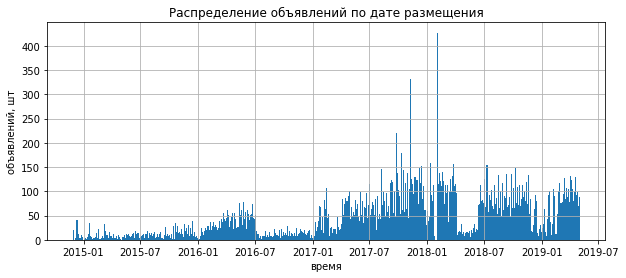

In [47]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
# Заодно оценим распределение объявлений по датам:
df['first_day_exposition'].hist(bins=500, figsize=(10,4)).set(title='Распределение объявлений по дате размещения', xlabel='время', ylabel='объявлений, шт');

Несколько дат демонстрируют аномально высокое присутствие в выборке, но в остальном данные выглядят корректно.

### Срок размещения

In [48]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

На первый взгяд, корректные цифры. Есть существенное количество пропусков, но заполнение их по меданному принципу может исказить статистику - есть подозрение, что в распределении, как и в столбце `first_day_exposition` имеются аномалии, которыми мы займемся на этапе исследования.

### Расстояние до центра

In [49]:
df['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Значения лежат в разумных пределах. Более 20% даннных пропущено - меж тем этот столбец будет использоваться в исследовании, но в первую очередь для объектов, находящихся в Санкт-Петербурге. Оценим пропуски в этом срезе:

In [50]:
df.query('simplified_locality == "Санкт-Петербург"')['cityCenters_nearest'].isna().sum()

61

В городе всего 61 пропуск (менее 0,4% от выборки), целесообразнее будет отбросить эти строки при исследовании, чем вводить сложные методы их заполнения с сомнительной надежностью.

### Ближайшие объекты

In [51]:
df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [52]:
df.query('airports_nearest < 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,simplified_locality
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,Санкт-Петербург


In [53]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [54]:
df.query('parks_nearest < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,simplified_locality
2527,8,4690000,60.3,2016-03-05,2,2.50,5,28.00,2,False,False,False,7.9,0,Кронштадт,69775.0,51500.0,3.0,9.0,3.0,345.0,146.0,Кронштадт
9344,12,3000000,28.1,2017-07-25,1,2.50,9,17.00,1,False,False,False,5.6,0,Санкт-Петербург,12051.0,11665.0,1.0,7.0,1.0,780.0,440.0,Санкт-Петербург
11949,7,4500000,44.0,2017-11-24,2,2.60,9,30.00,7,False,False,False,7.0,0,Санкт-Петербург,11806.0,12292.0,1.0,3.0,1.0,508.0,82.0,Санкт-Петербург
14624,8,3770000,45.4,2019-03-20,2,2.55,9,28.43,2,False,False,False,6.9,0,Санкт-Петербург,43932.0,16436.0,1.0,1.0,0.0,NaN,42.0,Санкт-Петербург
20193,3,11809670,102.6,2017-04-21,3,2.55,9,NaN,3,False,False,False,17.8,2,Санкт-Петербург,27562.0,6410.0,2.0,9.0,2.0,480.0,90.0,Санкт-Петербург
22941,8,10965000,69.3,2019-01-10,1,3.00,4,48.90,4,True,False,False,NaN,2,Зеленогорск,73391.0,54490.0,3.0,4.0,1.0,217.0,110.0,Зеленогорск


In [55]:
df['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

В этих столбцах большой процент пропусков, для заполнения которых у нас нет данных. Присутствует также небольшое количество подозрительно малых значений. Однако **данные из этих столбцов не используются в исследовании**, и мы можем оставить их как есть.

In [56]:
df['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [57]:
df['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Указанные значения выглядят технически корректными. Не указанные значения для числа парков и водоемов можно заполнить нулями (тем более что **данные из этих столбцов также не используются в исследовании**), чтобы привести эти столбцы к целому типу:

In [58]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype(int)
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype(int)

### Вывод

Столбцы `living_area` и `kitchen_area` (полезная жилая площадь и площадь кухни) имеют около 8% и 10% пропусков соответственно. Возможно заполнение их усредненными значениями на базе общей площади, но на данном этапе мы не будем этого делать. Аномальные значения площадей также целесообразнее рассмотреть на этапе исследования.

Столбец `ceiling_height` (высота потолков) содержит пропуски и массу некоректных значений, большая часть которых явно вызвана ошибкой при вводе или обработке десятичной точки. Валидация ввода (например, значение не должно быть менее 2.0 или иметь двузначную целую часть) могла бы существенно улучшить качество данных.
Значения, предположительно вызванные отсутствием десятичной точки, мы поделили на 10, другие пустые и некорректные значения заменили медианными значениями по этажности, где это было возможно, в остальных случаях было использовано медианное значение по столбцу.
Уникальное значение 100 было сохранено, т.к. данные в этой строке позволяют подозревать в нем особый смысл (отсутствие потолка). Этот момент также неплохо было бы прояснить с создателями выгрузки.

Столбец `floors_total` (число этажей в здании) содержит небольшое (0,4%) количество пропусков, для заполнения которых недостаточно данных. Пустые значения мы заполнили нулями и привели столбец к целому типу. Пропусков можно было бы избежать, заполняя данные автоматически на основе адреса.

Столбец `is_apartment` (относится ли объект к классу апартаментов) содержит много пропусков, которые мы трактуем как *False*. Столбец был приведен к булеву типу.

Примерно то же можно сказать о столбце `balcony` - пустые значения мы трактуем как отсутствие балкона. Столбец был приведен к целому типу.

Столбец `locality_name` (название населенного пункта) содержит смысловые дубликаты, по-видимому, вызванные заполнением данных вручную (разнобой в написании е/ё и вида населенного пункта). Был создан новый столбец `simplified_locality`, где данные были обработаны, а тип населенного пункта отброшен.
Столбец содержит небольшое (0,2%) число пропусков, часть которых мы заполнили на основании их близости к центру Санкт-Петербурга, для заполнения еще 21 строки нет достаточных оснований.

Столбец `first_day_exposition` (дата размещения) содежит корректные данные, хотя и с необычно высокой активностью в определенные даты. Столбец был приведен к временному типу (*datetime*) без неиспользуемой временной части (только даты).

Столбец `days_exposition` (длительность размещения) содержит около 13% пропусков. На данном этапе мы не стали заполнять их медианами и приводить к целому типу из-за серьезных подозрений на аномалии распределения.

Столбец `cityCenters_nearest` (расстояние до центра города) содержит большое количество пропусков (более 20%), которые не представляется целесообразным заполнять. Однако большая часть пропусков относится к населенным пунктам за чертой Санкт-Петербурга, и для целей исследования качество данных можно считать удовлетворительным.
Ввиду большого числа пропусков мы не можем пока привести этот столбец к целому типу, но в ходе исследования мы создадим на его базе отдельную колонку с округленными значениями в километрах.

Столбец `last_price` содержит (технически) корректные данные. Поскольку дробная часть значения не используется, он был приведен к целочисленному типу. Ценовые аномалии будут отбрасываться на этапе исследования.

В столбце `rooms` используется значение 0 для большинства квартир-студий и открытой планировки. Это значение было сохранено, для подобных объектов, маркированных иначе, значение было изменено на 0.

В столбце `total_images` несколько странно повышенное количество объявлений с 20 фотографиями и очень маленькое - с б*о*льшим числом фото. Это может быть вызвано багом при подсчете, необычное значение стоит обсудить с авторами выгрузки.

Столбцы `airports_nearest`, `ponds_nearest`,`parks_nearest` большей частью не заполнены. Поскольку эти данные не пригодятся нам в исследовании, мы не будем их касаться.
Столбцы `ponds_around3000` и `parks_around3000` имеют порядка 23% пропусков, которые мы трактуем как нулевые значения. Эти столбцы также не используются в исследовании. Столбцы были приведены к целому типу.

## Расчёты и добавление результатов в таблицу

Рассчитаем и добавим в таблицу цену за квадратный метр, для наглядности сразу как целое:

In [59]:
# Тут все очевидно, цену делим на площадь:
df['price_per_sqm'] = (df['last_price']/df['total_area']).round().astype('uint32')

День недели, месяц и год публикации объявления нетрудно получить с помощью стандартных функций dt:

In [60]:
df['expo_weekday'] = df['first_day_exposition'].dt.weekday
df['expo_month'] = df['first_day_exposition'].dt.month
df['expo_year'] = df['first_day_exposition'].dt.year

Далее идет категоризация этажей на первый/последний/другой:

In [61]:
def categorize_floors (row):
    try:
        total = row['floors_total']
        floor = row['floor']
        if floor == 1:
            # Отметим, что в одноэтажном доме он будет и первым, и последним. Но естественнее указать - первый.
            return 'первый'
        elif floor == total:
            return 'последний'
        else:
            return 'другой'
    except:
        return '<данные повреждены>'
    
df['floor_category'] = df.apply(categorize_floors, axis=1)

Осталось вычислить соотношения площадей, округлив до двух знаков после запятой:

In [62]:
df['living_area_fraction'] = (df['living_area']/df['total_area']).astype('float32').round(2)
df['kitchen_area_fraction'] = (df['kitchen_area']/df['total_area']).astype('float32').round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,simplified_locality,price_per_sqm,expo_weekday,expo_month,expo_year,floor_category,living_area_fraction,kitchen_area_fraction
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82921,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92786,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.60,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000,1,6,2018,другой,0.32,0.41


### Изменение типов данных

In [63]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
total_images             23699 non-null int64
last_price               23699 non-null int64
total_area               23699 non-null float64
first_day_exposition     23699 non-null datetime64[ns]
rooms                    23699 non-null int64
ceiling_height           23699 non-null float64
floors_total             23699 non-null int64
living_area              21796 non-null float64
floor                    23699 non-null int64
is_apartment             23699 non-null bool
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             21421 non-null float64
balcony                  23699 non-null int64
locality_name            23650 non-null object
airports_nearest         18157 non-null float64
cityCenters_nearest      18180 non-null float64
parks_around3000         23699 non-null int64
parks_nearest            8079 non-null float

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.00,6.00,9.00,14.00,5.000000e+01
last_price,23699.0,6.541549e+06,1.088701e+07,12190.00,3400000.00,4650000.00,6800000.00,7.630000e+08
total_area,23699.0,6.034865e+01,3.565408e+01,12.00,40.00,52.00,69.90,9.000000e+02
rooms,23699.0,2.069328e+00,1.079409e+00,0.00,1.00,2.00,3.00,1.900000e+01
ceiling_height,23699.0,2.711749e+00,6.742140e-01,2.00,2.55,2.65,2.75,1.000000e+02
floors_total,23699.0,1.063509e+01,6.616396e+00,0.00,5.00,9.00,16.00,6.000000e+01
living_area,21796.0,3.445785e+01,2.203045e+01,2.00,18.60,30.00,42.30,4.097000e+02
floor,23699.0,5.892358e+00,4.885249e+00,1.00,2.00,4.00,8.00,3.300000e+01
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.30,7.00,9.10,12.00,1.120000e+02
balcony,23699.0,5.910798e-01,9.592982e-01,0.00,0.00,0.00,1.00,5.000000e+00


In [65]:
# total_images, floors_total, floor, balcony, parks_around3000, ponds_around3000,
# expo_weekday, expo_month, expo_year
# Очень мало уникальных значений, арифметика не используется. Запишем в категории.
df['total_images'] = df['total_images'].astype('category')
df['floors_total'] = df['floors_total'].astype('category')
df['floor'] = df['floor'].astype('category')
df['balcony'] = df['balcony'].astype('category')
df['parks_around3000'] = df['parks_around3000'].astype('category')
df['ponds_around3000'] = df['ponds_around3000'].astype('category')
df['expo_weekday'] = df['expo_weekday'].astype('category')
df['expo_month'] = df['expo_month'].astype('category')
df['expo_year'] = df['expo_year'].astype('category')

# rooms: в принципе, тоже категория, но мы пользуемcя арифметикой для графиков.
# uint8 подойдет с большим запасом:
df['rooms'] = df['rooms'].astype('uint8')

# locality_name, simplified_locality, floor_category: категории всегда лучше, чем строки.
df['locality_name'] = df['locality_name'].astype('category')
df['simplified_locality'] = df['simplified_locality'].astype('category')
df['floor_category'] = df['floor_category'].astype('category')

# last_price, price_per_sqm: максимум в миллионах, целые положительные, uint32 за глаза.
# Есть некоторые мелкие числа, которые мы не выкидывали, так-то можно и до тысяч/миллионов округлить.
df['last_price'] = df['last_price'].astype('uint32')

# На вещественные значения, казалось бы, одинарной точности для хранения хватает,
# но когда начнутся вычисления статистики (то есть практически любой пивот или даже describe()), все станет очень плохо.
df['ceiling_height'] = df['ceiling_height'].astype('float32')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('float32')
df['total_area'] = df['total_area'].astype('float32')
df['living_area'] = df['living_area'].astype('float32')
df['kitchen_area'] = df['kitchen_area'].astype('float32')

# к целому не приводили из-за большого числа NaN-ов, целесообразней было бы три неиспользуемых столбца просто дропнуть, но пусть живут:
df['airports_nearest'] = df['airports_nearest'].astype('float32')
df['parks_nearest'] = df['parks_nearest'].astype('float32')
df['ponds_nearest'] = df['ponds_nearest'].astype('float32')

# days_exposition: не приводили тип из-за пропусков, пусть побудет float32:
df['days_exposition'] = df['days_exposition'].astype('float32')

In [66]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
total_images             23699 non-null category
last_price               23699 non-null uint32
total_area               23699 non-null float32
first_day_exposition     23699 non-null datetime64[ns]
rooms                    23699 non-null uint8
ceiling_height           23699 non-null float32
floors_total             23699 non-null category
living_area              21796 non-null float32
floor                    23699 non-null category
is_apartment             23699 non-null bool
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             21421 non-null float32
balcony                  23699 non-null category
locality_name            23650 non-null category
airports_nearest         18157 non-null float32
cityCenters_nearest      18180 non-null float32
parks_around3000         23699 non-null category
parks_nearest            8

In [67]:
print (f'Экономия памяти составила {(12.3-1.9)/12.3:.1%}')

Экономия памяти составила 84.6%


In [68]:
pd.set_option('precision', 2)
df.sample (n=10, random_state=177013)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,simplified_locality,price_per_sqm,expo_weekday,expo_month,expo_year,floor_category,living_area_fraction,kitchen_area_fraction
593,20,4200000,38.3,2019-04-16,1,2.60,16,19.8,10,False,False,False,10.1,2,Санкт-Петербург,NaN,NaN,0,NaN,0,NaN,NaN,Санкт-Петербург,109661,1,4,2019,другой,0.52,0.26
13602,3,8200000,104.0,2019-01-23,3,2.95,4,68.5,4,False,False,False,14.4,2,Сестрорецк,54331.0,35394.0,0,NaN,0,NaN,NaN,Сестрорецк,78846,2,1,2019,последний,0.66,0.14
22418,17,6250000,54.3,2019-04-03,2,2.70,18,30.8,18,False,False,False,10.2,1,Кудрово,NaN,NaN,0,NaN,0,NaN,26.0,Кудрово,115101,2,4,2019,последний,0.57,0.19
23641,3,3100000,30.0,2018-03-28,1,2.50,5,17.0,5,False,False,False,5.0,0,Колпино,24056.0,29843.0,0,NaN,0,NaN,10.0,Колпино,103333,2,3,2018,последний,0.57,0.17
2828,18,15700000,93.0,2017-09-20,3,2.80,22,61.0,19,False,False,False,12.0,1,Санкт-Петербург,44382.0,16921.0,0,NaN,0,NaN,300.0,Санкт-Петербург,168817,2,9,2017,другой,0.66,0.13
11254,4,2710000,34.0,2017-09-18,1,2.80,5,18.0,4,False,False,False,8.0,0,посёлок Парголово,53042.0,22968.0,0,NaN,3,282.0,45.0,Парголово,79706,0,9,2017,другой,0.53,0.24
14527,12,4777000,45.0,2018-10-31,2,2.55,5,27.3,1,False,False,False,7.2,0,Санкт-Петербург,48402.0,14962.0,1,590.0,1,857.0,100.0,Санкт-Петербург,106156,2,10,2018,первый,0.61,0.16
15529,2,4080000,61.0,2018-03-27,2,2.75,25,38.8,10,False,False,False,9.2,1,посёлок Шушары,13931.0,19717.0,0,NaN,1,582.0,59.0,Шушары,66885,1,3,2018,другой,0.64,0.15
4253,0,6690000,66.0,2018-11-14,3,2.58,14,43.0,10,False,False,False,NaN,0,Санкт-Петербург,12835.0,15427.0,0,NaN,0,NaN,72.0,Санкт-Петербург,101364,2,11,2018,другой,0.65,NaN
8163,6,4600000,39.6,2014-12-14,1,2.75,14,21.0,8,False,False,False,10.0,2,Санкт-Петербург,41570.0,11703.0,1,493.0,0,NaN,649.0,Санкт-Петербург,116162,6,12,2014,другой,0.53,0.25


## Исследовательский анализ данных

### Общие параметры

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра. Подготовим маски для фильтрации аномальных значений для дальнейшего анализа.

#### Общая площадь

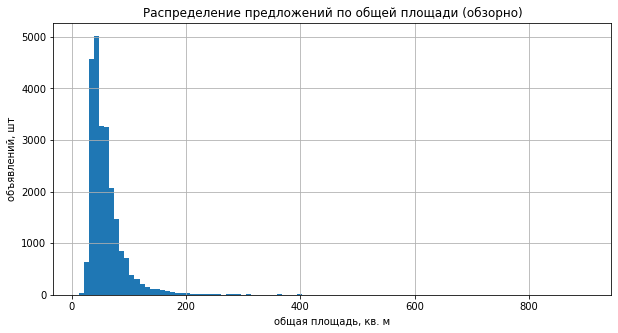

In [69]:
df['total_area'].hist(bins=100, figsize=(10,5)).set(title='Распределение предложений по общей площади (обзорно)', xlabel='общая площадь, кв. м', ylabel='объявлений, шт');

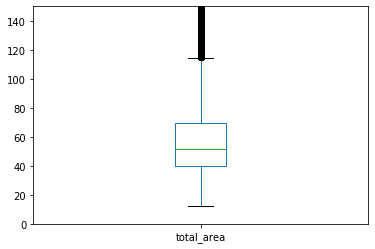

In [70]:
df['total_area'].plot(kind='box', ylim=(0,150))

Гистограмма по всем площадям не слишком наглядна - у нас большой "хвост" из редких больших значений, достигающих 900(!) при медиане в 52 кв.м:

In [71]:
df['total_area'].describe()

count    23699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

Для удобства будем ограничивать размах гистограммы тремя стандартными отклонениями:

In [72]:
def sane_limit(dataframe, column):
    try:
        deviation = dataframe[column].std()
        median = dataframe[column].median()
        floor = dataframe[column].min()
        ceil = dataframe[column].max()
        limit = (max(floor, median - 3 * deviation), min (ceil, median + 3 * deviation))
        return limit
    except:
        print('Проверьте правильность аргументов!')
        return (0,0)

area_limit = sane_limit(df, 'total_area')

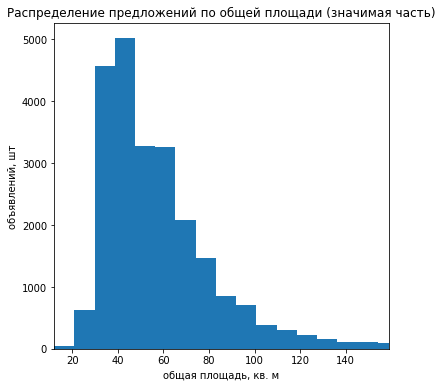

In [73]:
df['total_area'].plot(y='total_area', kind='hist', bins=100, xlim=area_limit, figsize=(6,6)).set(title='Распределение предложений по общей площади (значимая часть)', xlabel='общая площадь, кв. м', ylabel='объявлений, шт');

Средняя площадь квартиры на рынке - около 60 кв.м. Половина всех предложений лежит в зоне 40-70 кв.м. Предложений менее 30 м на рынке относительно немного, большие площади представлены шире - почти четверть рынка приходится на предложения от 70 до 200 м, есть и более крупные. В целом распределение площадей практически нормальное.

Оценим диапазон площадей, значимых для исследования:

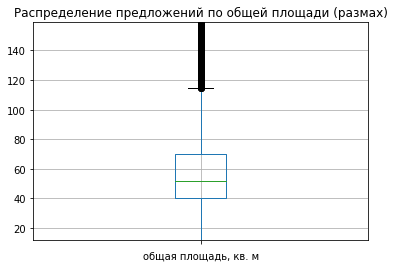

In [74]:
df['total_area'].plot(kind='box', ylim=area_limit, grid=True, label='').set(title='Распределение предложений по общей площади (размах)', xlabel='общая площадь, кв. м');

Согласно диаграмме размаха, площади свыше 120 кв. м можно признать слишком редкими для включения в исследование закономерностей рынка. Запомним это условие для использования в дальнейшем:

In [75]:
too_large = df['total_area'] > 120

#### Цена

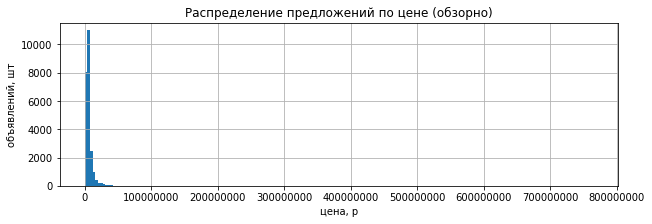

In [76]:
df['last_price'].hist(bins=200, figsize=(10,3)).set(title='Распределение предложений по цене (обзорно)', xlabel='цена, р', ylabel='объявлений, шт');

Разброс цен тоже очень велик, 75% предложений находятся в пределах 6,8 млн, но есть и объекты дороже на два порядка!

In [77]:
df['last_price'].describe().apply("{:.0f}".format)

count        23699
mean       6541549
std       10887013
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: object

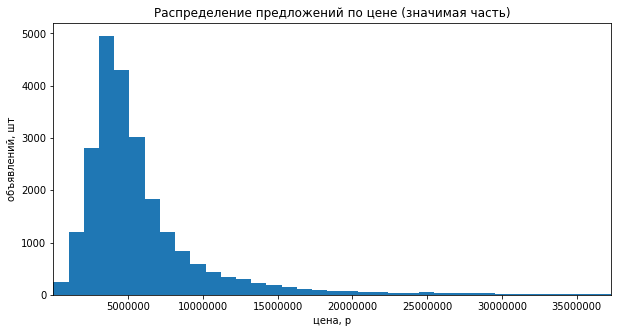

In [78]:
price_limit = sane_limit(df, 'last_price')
df['last_price'].plot(y='last_price', kind='hist', bins=750, xlim=price_limit, figsize=(10,5)).set(title='Распределение предложений по цене (значимая часть)', xlabel='цена, р', ylabel='объявлений, шт');

Средняя цена квартиры составляет около 6,5 млн, а медианная - 4,65 млн. Подавляющее большинство предложений находится в диапазоне 2-7 млн, более дешевых предложений немного, дорогих больше, на любой вкус - до 20 млн и даже выше, вплоть до совсем уж шикарных объектов.
Распределение в статистически значимом диапазоне также вполне нормальное.

Оценим диапазон цен, значимых для исследования, поточнее:

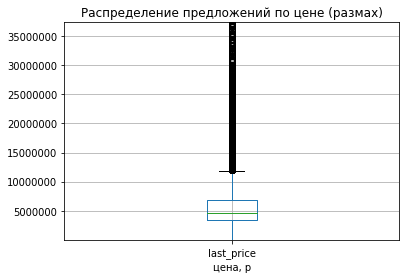

In [79]:
df['last_price'].plot(kind='box', ylim=price_limit, grid=True).set(title='Распределение предложений по цене (размах)', xlabel='цена, р');

Диаграмма размаха советует нам признать цены свыше 12 млн слишком редкими для надежного исследования. В то же время некоторое количество аномально низких цен статистики не портит. Запомним это условие для использования в дальнейшем:

In [80]:
too_expensive = df['last_price'] > 12000000

А что насчет цены квадратного метра?

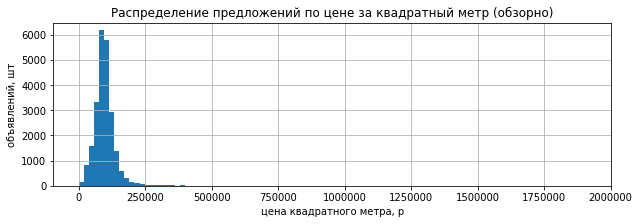

In [81]:
df['price_per_sqm'].hist(bins=100, figsize=(10,3)).set(title='Распределение предложений по цене за квадратный метр (обзорно)', xlabel='цена квадратного метра, р', ylabel='объявлений, шт');

In [82]:
df['price_per_sqm'].describe().apply("{:.0f}".format)

count      23699
mean       99422
std        50307
min          112
25%        76586
50%        95000
75%       114256
max      1907500
Name: price_per_sqm, dtype: object

Тоже большой разброс, посмотрим поближе:

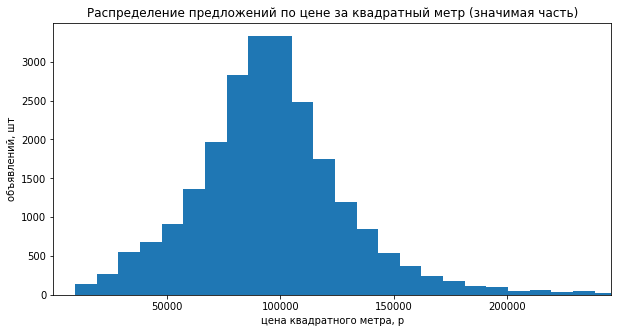

In [83]:
sqm_price_limit = sane_limit(df, 'price_per_sqm')
df['price_per_sqm'].plot(y='price_per_sqm', kind='hist', bins=200, xlim=sqm_price_limit, figsize=(10,5)).set(title='Распределение предложений по цене за квадратный метр (значимая часть)', xlabel='цена квадратного метра, р', ylabel='объявлений, шт');

Средняя цена за квадратный метр составляет почти ровно 100000, медианная - 95000. Распределение довольно плавное и совершенно нормальное. Оценим статистически значимый диапазон цен:

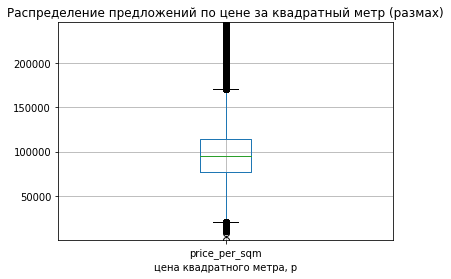

In [84]:
df['price_per_sqm'].plot(kind='box', ylim=sqm_price_limit, grid=True).set(title='Распределение предложений по цене за квадратный метр (размах)', xlabel='цена квадратного метра, р');

Диаграмма размаха советует нам отбросить цены ниже 20000 за квадратный метр (мы действительно видим там очень подозрительные строки) и выше 170000. Запишем эти условия:

In [85]:
too_cheap_sqm = df['price_per_sqm'] < 20000
too_expensive_sqm = df['price_per_sqm'] > 170000

#### Число комнат

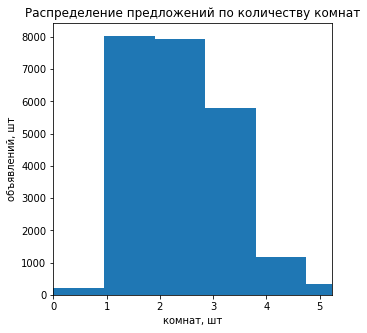

In [86]:
room_limit = sane_limit(df, 'rooms')
df['rooms'].plot(y='rooms', kind='hist', bins=20, xlim=room_limit, figsize=(5,5)).set(title='Распределение предложений по количеству комнат', xlabel='комнат, шт', ylabel='объявлений, шт');

In [87]:
df['rooms'].describe()

count    23699.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

Средняя квартира на рынке двухкомнатная, как и следовало ожидать. Однокомнатных в продаже, впрочем, даже чуть больше, трехкомнатных уже существенно меньше. Предложение квартир-студий и квартир открытой планировки остается, как ни странно, совсем небольшим, даже меньше, чем квартир с 4 и 5 комнатами. Изредка можно встретить и более экзотические расклады - до 19 комнат! - но погоды на рынке они не делают. Распределение и здесь практически нормальное.

Определим поточнее, какой диапазон комнат целесообразен для более глубокого исследования:

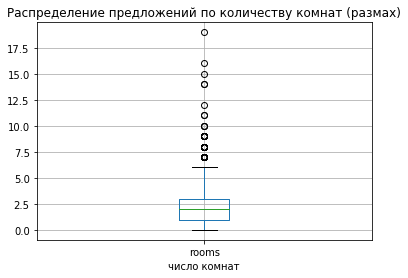

In [88]:
df['rooms'].plot(kind='box', grid=True).set(title='Распределение предложений по количеству комнат (размах)', xlabel='число комнат');

Диаграмма размаха советует нам ограничиться 6 комнатами, так и поступим:

In [89]:
too_much_rooms = df['rooms'] > 6

#### Высота потолков

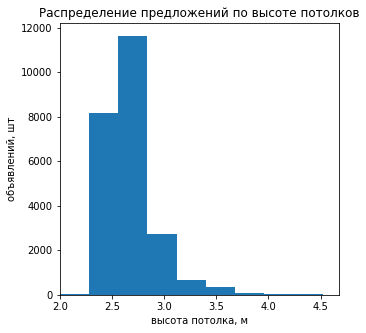

In [90]:
height_limit = sane_limit(df, 'ceiling_height')
df['ceiling_height'].plot(y='ceiling_height', bins=350, kind='hist', xlim=height_limit, figsize=(5,5)).set(title='Распределение предложений по высоте потолков', xlabel='высота потолка, м', ylabel='объявлений, шт');

In [91]:
df.query('ceiling_height < 100')['ceiling_height'].describe()

count    23698.00
mean         2.71
std          0.23
min          2.00
25%          2.55
50%          2.65
75%          2.75
max          6.00
Name: ceiling_height, dtype: float64

Ничего неожиданного - подавляющее большинство потолков имеют высоту от 2,4 до 2,8 м и близки к среднему в 2,7 м. Значения меньше встречаются крайне редко, поскольку давно уже не считаются допустимыми в серийном жилье. Значения выше тоже встречаются нечасто, но все же можно найти предложения до 3,6 м. Есть немного вариантов и больше, вплоть до 4.5м, изредка встречаются и б*о*льшие цифры. И снова почти нормальное распределение.

Лимитировать высоту потолка для исследования не будем, поскольку она не входит в перечень исследуемых ценовых факторов.

#### Вывод

Общая площадь в выборке колеблется в очень широких пределах - от 12 до 900 кв. м. То же с общей стоимостью объекта - 12 тыс до 763 млн, цена за квадратный метр составляет от 112 до 1.9 млн. Высота потолков - от 2 до 6 м. Количество комнат колеблется от 1 до 19, квартиры-студии и квартиры открытой планировки условно помечены как 0 комнат. Все распределения значений можно считать нормальными.

Средняя квартира на рынке двухкомнатная (хотя мода приходится на однокомнатную квартиру), площадью около 60 кв. м (52 по медиане), с потолками высотой 2,65-2,7 м и ценой около 6,5 млн (4,65 по медиане).

Аномальными и нетипичными показателями можно считать:
- площадь свыше 120 кв. м;
- число комнат свыше 6;
- цену свыше 12 млн;
- цену за квадратный метр свыше 170000 или ниже 20000.

### Время продажи

Изучим время продажи квартиры, Определим типичные сроки продажи и аномально быстрые/медленные значения.

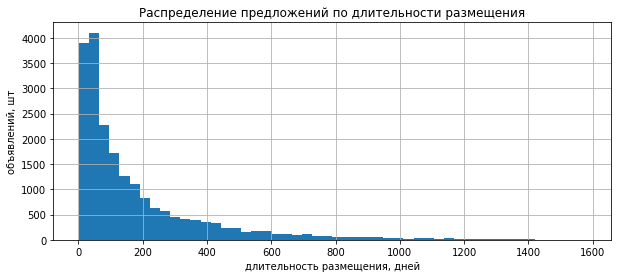

In [92]:
# Построим гистограмму первого приближения:
df['days_exposition'].hist(bins=50, figsize=(10,4)).set(title='Распределение предложений по длительности размещения', xlabel='длительность размещения, дней', ylabel='объявлений, шт');

count    20518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max       1580.00
Name: days_exposition, dtype: float64

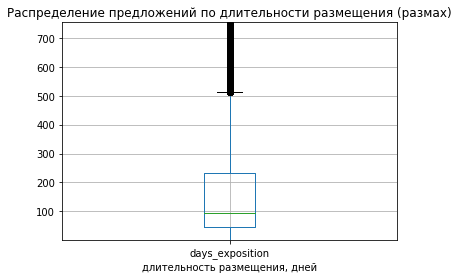

In [93]:
# Диаграмма размаха тоже пригодится:
time_limit = sane_limit(df, 'days_exposition')
df['days_exposition'].plot(kind='box', ylim=time_limit, grid=True).set(title='Распределение предложений по длительности размещения (размах)', xlabel='длительность размещения, дней');
df['days_exposition'].describe()

В первом приближении обычное распределение Пуассона, но взглянем на первые 75% выборки поближе:

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

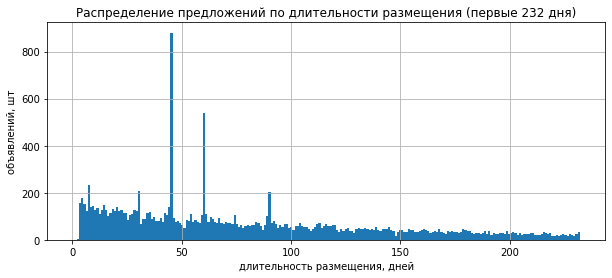

In [94]:
df['days_exposition'].hist(bins=233, range=(0,232), figsize=(10,4)).set(title='Распределение предложений по длительности размещения (первые 232 дня)', xlabel='длительность размещения, дней', ylabel='объявлений, шт');
df['days_exposition'].sort_values(ascending=False).value_counts().head(10)

Пики образуются на значениях в 7, 30, 45, 60 и 90 дней. Объяснить это можно тем, что снятие объявления не обязательно означает продажу - объявление ведь размещается на определенный срок. Неделя, условный месяц (а также полтора, два и три) очень похожи на такие стандартные сроки размещения.

К сожалению, у нас нет никаких данных, позволяющих судить о причине снятия объявления. Этот вопрос следовало бы обсудить с авторами выгрузки. Нам придется исключить данные с этими значениями из выборки.

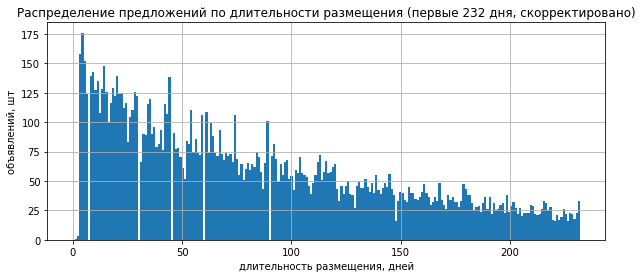

In [95]:
# Исключим все строки с пропущенными значениями и приведем столбец к целому типу:
df_filtered = df.dropna(subset=['days_exposition']).reset_index(drop=True)
df_filtered['days_exposition'] = df_filtered['days_exposition'].astype(int)

# А теперь исключим строки с аномальными значениями:
df_filtered = df_filtered.query('days_exposition not in [7,30,45,60,90]')
df_filtered['days_exposition'].hist(bins=233, range=(0,232), figsize=(10,4)).set(title='Распределение предложений по длительности размещения (первые 232 дня, скорректировано)', xlabel='длительность размещения, дней', ylabel='объявлений, шт');

Вот теперь распределение похоже на правду. Какие еще значения можно считать аномальными? 

count    18454.00
mean       195.80
std        226.76
min          1.00
25%         44.00
50%        114.00
75%        259.00
max       1580.00
Name: days_exposition, dtype: float64

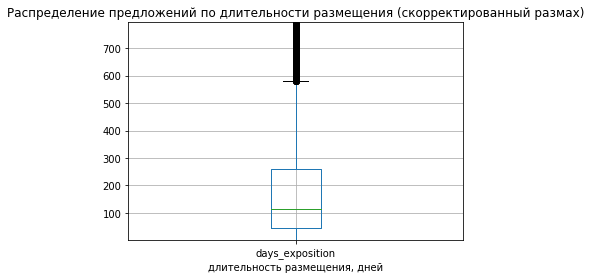

In [96]:
time_limit2 = sane_limit(df_filtered, 'days_exposition')
df_filtered['days_exposition'].plot(kind='box', ylim=time_limit2, grid=True).set(title='Распределение предложений по длительности размещения (скорректированный размах)', xlabel='длительность размещения, дней');
df_filtered['days_exposition'].describe()

В итоге среднее значение составило около 196 дней, медианное - 114 дней.
Продажи в первые дни выглядят в пределах нормы, диаграмма размаха с этим согласна - аномально быстрых продаж вроде бы нет. Зато немало объявлений висят очень долго, самое старое на момент снятия имело возраст больше 4 лет. Верхняя граница диаграммы размаха, изначально лежавшая около 500 дней, после удаления аномалий находится около 580, примем для ровного счета - 600 дней. Размещения дольше этого срока можно считать аномально долгими.

#### Вывод

В датасете представлены объявления, активные в период от 1 дня до 1580 дней, при этом нет данных, позволяющих судить о том, было ли объявление снято по результату продажи или нет. Мы обнаружили аномально высокое количество объявлений, снятых через 7, 30, 45, 60 и 90 дней и исключили их из выборки (исходя из предположения, что это объявления, снятые автоматически по истечении стандартного срока), что до остальных, остается предположить, что средняя доля результативных продаж среди них примерно равна. После этой коррекции распределение значений соответствует распределению Пуассона, среднее значение около 196 дней, при этом половина квартир продается в течение 114 дней, а к нетипичным значениям можно отнести сроки длиннее 600 дней.

Крайне желательно было бы вносить в данные причину снятия объявления!

### Факторы, влияющие на стоимость объекта

Исследуем, насколько зависит ли цена от площади, числа комнат, удалённости от центра, этажа и даты размещения.

In [97]:
# Исключим нетипичные значения из выборки:
df_filtered = df[(too_large == False) & (too_expensive == False) & (too_much_rooms == False) & (too_expensive_sqm == False) & (too_cheap_sqm == False)]

#### Общая площадь

Начнем с рассмотрения взаимосвязи цены и площади. Рассмотрим как общую стоимость, так и цену квадратного метра:

0.7279348715818619

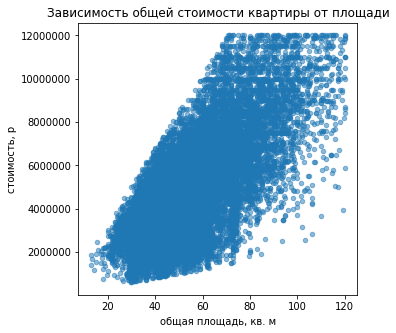

In [98]:
# Построим диаграмму рассеяния:
df_filtered.plot(kind='scatter', y='last_price', x='total_area', figsize=(5,5), alpha=0.5).set(title='Зависимость общей стоимости квартиры от площади', xlabel='общая площадь, кв. м', ylabel='стоимость, р');
# И вычислим коэффициент корреляции:
df_filtered['total_area'].corr(df_filtered['last_price'])

Зависимость цены квартиры от ее площади очевидна и выглядит практически линейно, коэффициент Пирсона высокий - 0,73. Для большей наглядности посмотрим на усредненные цены:

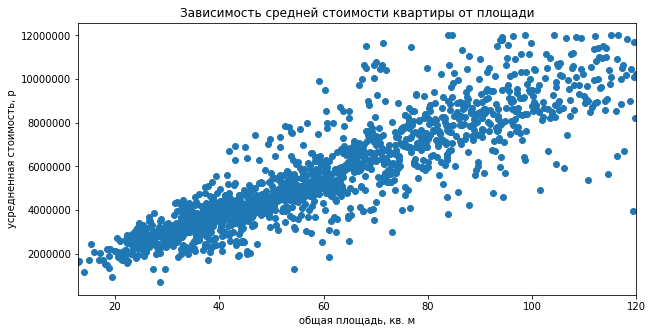

In [99]:
area_pivot = df_filtered.pivot_table(index='total_area', values='last_price')
area_pivot.plot(style='o', figsize=(10,5), legend=False).set(title='Зависимость средней стоимости квартиры от площади', xlabel='общая площадь, кв. м', ylabel='усредненная стоимость, р');

-0.061059633244853494

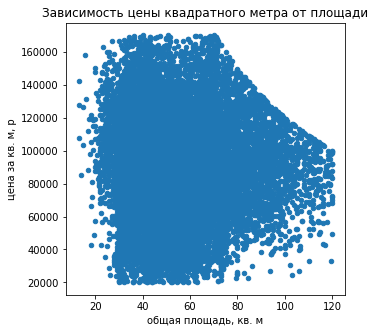

In [100]:
df_filtered.plot(kind='scatter', y='price_per_sqm', x='total_area', figsize=(5,5)).set(title='Зависимость цены квадратного метра от площади', xlabel='общая площадь, кв. м', ylabel='цена за кв. м, р');
df_filtered['total_area'].corr(df_filtered['price_per_sqm'])

А вот средняя цена квадратного метра с ростом площади практически стабильна, даже разброс цен сужается.

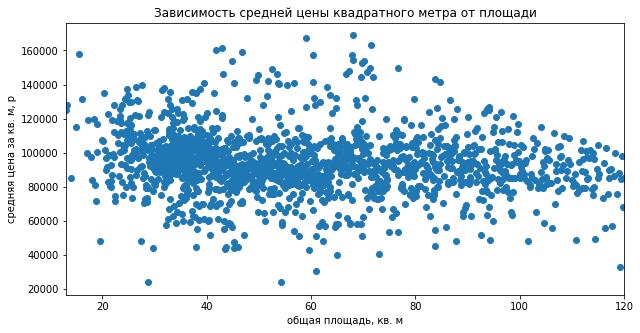

In [101]:
area_pivot = df_filtered.pivot_table(index='total_area', values='price_per_sqm')
area_pivot.plot(style='o', figsize=(10,5), legend=False).set(title='Зависимость средней цены квадратного метра от площади', xlabel='общая площадь, кв. м', ylabel='средняя цена за кв. м, р');

На усреднении практически горизонтальная полоса.

#### Количество комнат

0.467399163634241

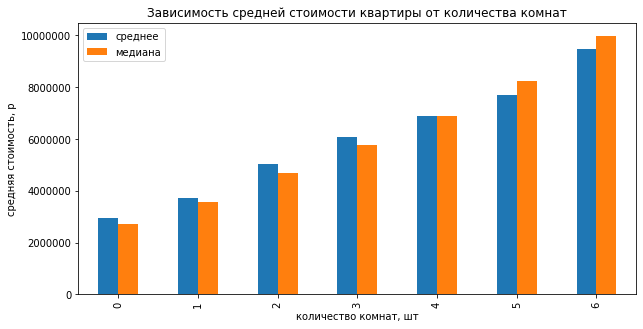

In [102]:
# У комнат не слишком много значений, здесь наглядее будет усредненная цена в виде линейной или столбчатой диаграммы:
room_pivot = df_filtered.pivot_table(index='rooms', values='last_price', aggfunc=['mean','median'])
room_pivot.columns=['среднее', 'медиана']
room_pivot.plot(kind='bar',figsize=(10,5)).set(title='Зависимость средней стоимости квартиры от количества комнат', xlabel='количество комнат, шт', ylabel='средняя стоимость, р');
# Вычислим коэффициент корреляции:
df_filtered['rooms'].corr(df_filtered['last_price'])

Средняя стоимость квартир растет практически линейно с увеличением числа комнат, коэффициент корреляции почти 0,5. А что насчет цены за метр?

-0.21729948626736006

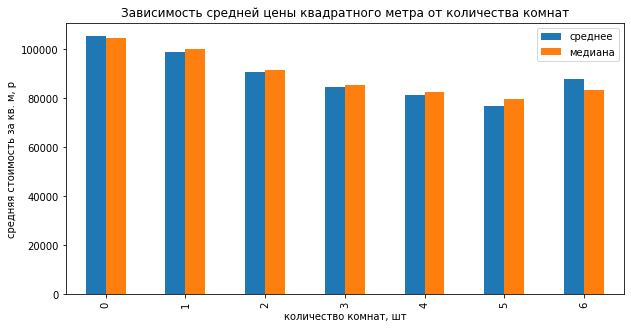

In [103]:
room_pivot_sqm = df_filtered.pivot_table(index='rooms', values='price_per_sqm', aggfunc=['mean','median'])
room_pivot_sqm.columns=['среднее', 'медиана']
room_pivot_sqm.plot(kind='bar',figsize=(10,5)).set(title='Зависимость средней цены квадратного метра от количества комнат', xlabel='количество комнат, шт', ylabel='средняя стоимость за кв. м, р');
# Вычислим коэффициент корреляции:
df_filtered['rooms'].corr(df_filtered['price_per_sqm'])

Здесь как раз есть небольшая обратная корреляция: чем больше комнат, тем ниже цена за метр, но у шестикомнатных квартир она снова растет. Отметим, что если бы мы не фильтровали данные, картина была бы немного другой:

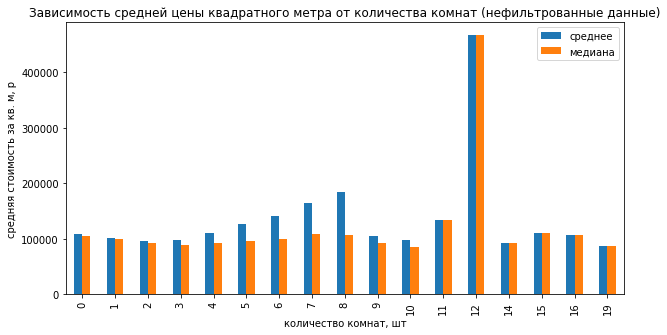

In [104]:
room_pivot_sqm2 = df.pivot_table(index='rooms', values='price_per_sqm', aggfunc=['mean','median'])
room_pivot_sqm2.columns=['среднее', 'медиана']
room_pivot_sqm2.plot(kind='bar',figsize=(10,5)).set(title='Зависимость средней цены квадратного метра от количества комнат (нефильтрованные данные)', xlabel='количество комнат, шт', ylabel='средняя стоимость за кв. м, р');

Самыми дешевыми за метр были бы трехкомнатные квартиры, затем цена бы плавно росла, пока тенденция не была бы сбита совсем уж маленькой выборкой.

Тем не менее, общая тенденция сохраняется: цена за квадратный метр с ростом числа комнат снижается, но лишь до определенного предела.

#### Удаленность от центра

-0.3409007505013958

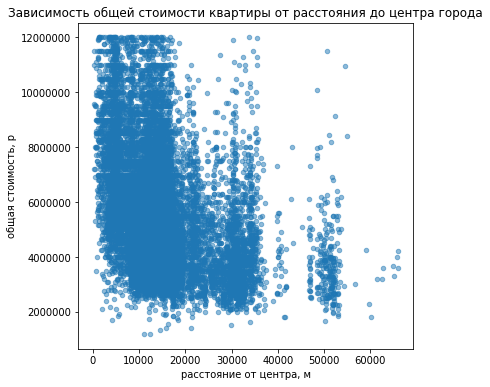

In [105]:
df_filtered.plot(kind='scatter', y='last_price', x='cityCenters_nearest', figsize=(6,6), alpha=0.5).set(title='Зависимость общей стоимости квартиры от расстояния до центра города', xlabel='расстояние от центра, м', ylabel='общая стоимость, р');
df_filtered['cityCenters_nearest'].corr(df_filtered['last_price'])

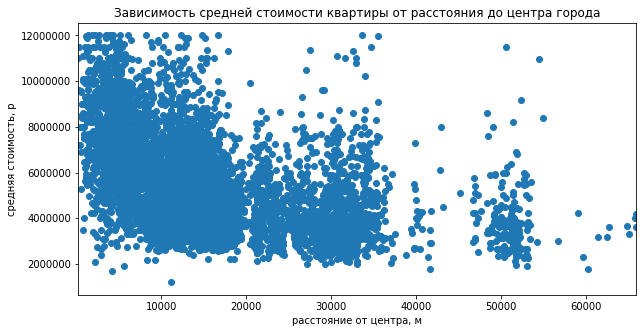

In [106]:
distance_pivot = df_filtered.pivot_table(index='cityCenters_nearest', values='last_price')
distance_pivot.plot(style='o', figsize=(10,5), legend=False).set(title='Зависимость средней стоимости квартиры от расстояния до центра города', xlabel='расстояние от центра, м', ylabel='средняя стоимость, р');

Квартиры бывают всякие, так что большой разброс цен ожидаем, но тем не менее даже по общей стоимости корреляция заметна (-0,34): чем ближе к центру, тем дороже.

-0.39295349622588804

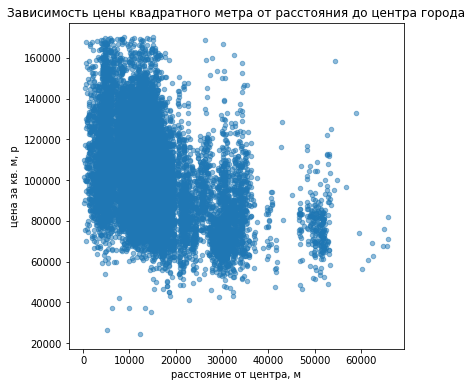

In [107]:
df_filtered.plot(kind='scatter', y='price_per_sqm', x='cityCenters_nearest', figsize=(6,6), alpha=0.5).set(title='Зависимость цены квадратного метра от расстояния до центра города', xlabel='расстояние от центра, м', ylabel='цена за кв. м, р');
df_filtered['cityCenters_nearest'].corr(df_filtered['price_per_sqm'])

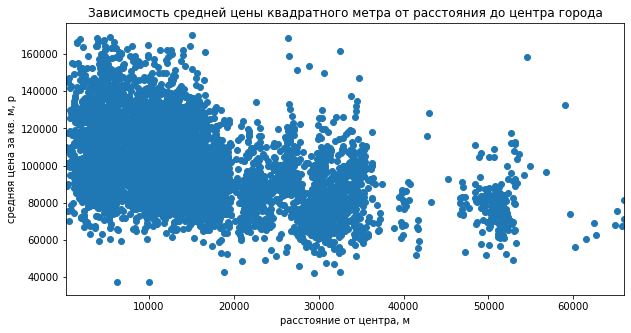

In [108]:
distance_pivot_sqm = df_filtered.pivot_table(index='cityCenters_nearest', values='price_per_sqm')
distance_pivot_sqm.plot(style='o', figsize=(10,5), legend=False).set(title='Зависимость средней цены квадратного метра от расстояния до центра города', xlabel='расстояние от центра, м', ylabel='средняя цена за кв. м, р');

По цене за метр корреляция еще заметнее: -0,39.

#### Этаж

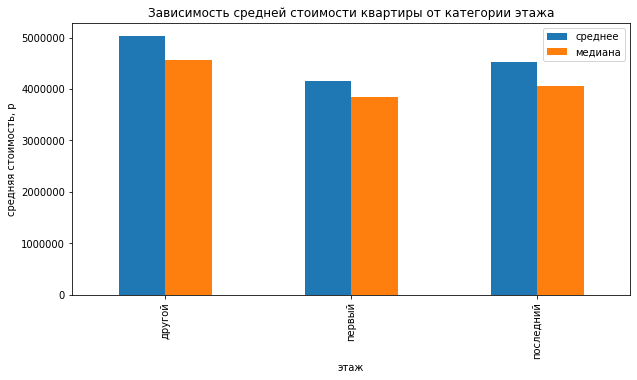

In [109]:
floor_pivot = df_filtered.pivot_table(index='floor_category', values='last_price', aggfunc=['mean','median'])
floor_pivot.columns=['среднее', 'медиана']
floor_pivot.plot(kind='bar',figsize=(10,5)).set(title='Зависимость средней стоимости квартиры от категории этажа', xlabel='этаж', ylabel='средняя стоимость, р');

Традиционно первый и последний этажи менее привлекательны, это находит отражение и в ценах, в нашей выборке средняя квартира на первом этаже аж на миллион дешевле обычного. Последний этаж в среднем подороже, но все равно уступает.

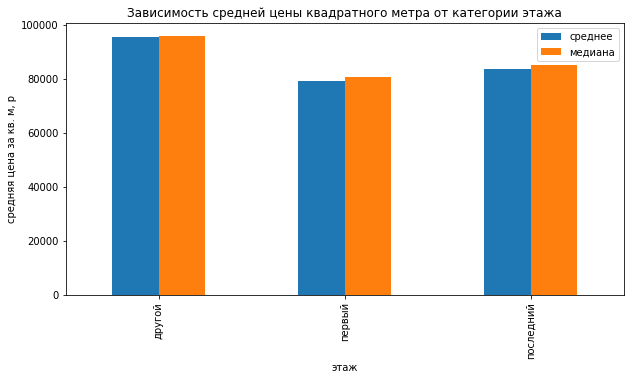

In [110]:
floor_pivot_sqm = df_filtered.pivot_table(index='floor_category', values='price_per_sqm', aggfunc=['mean','median'])
floor_pivot_sqm.columns=['среднее', 'медиана']
floor_pivot_sqm.plot(kind='bar',figsize=(10,5)).set(title='Зависимость средней цены квадратного метра от категории этажа', xlabel='этаж', ylabel='средняя цена за кв. м, р');

По цене за квадратный метр картина примерно та же: первый и последний этажи почти равны по цене, но все же первый чуть дешевле. В целом цена квадратного метра на первом и последнем этажах на 10-15% ниже.

#### Дата размещения

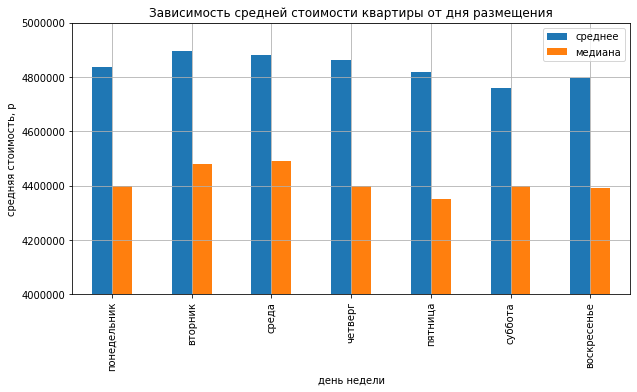

In [111]:
weekday_ticks=['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
weekday_pivot = df_filtered.pivot_table(index='expo_weekday', values='last_price', aggfunc=['mean','median'])
weekday_pivot.columns=['среднее', 'медиана']
weekday_pivot.plot(kind='bar',figsize=(10,5), grid=True, ylim=(4000000,5000000)).set(title='Зависимость средней стоимости квартиры от дня размещения', xlabel='день недели', ylabel='средняя стоимость, р', xticklabels=weekday_ticks);

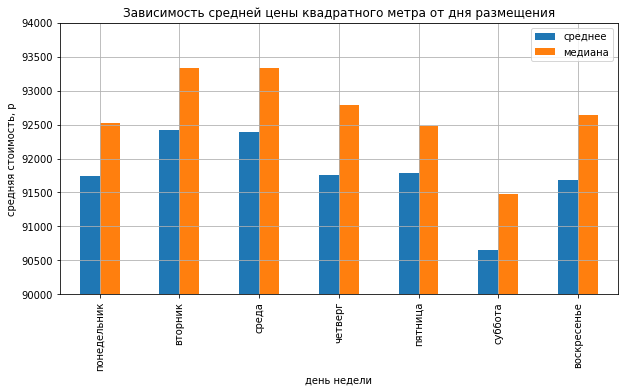

In [112]:
weekday_pivot_sqm = df_filtered.pivot_table(index='expo_weekday', values='price_per_sqm', aggfunc=['mean','median'])
weekday_pivot_sqm.columns=['среднее', 'медиана']
weekday_pivot_sqm.plot(kind='bar',figsize=(10,5), grid=True, ylim=(90000,94000)).set(title='Зависимость средней цены квадратного метра от дня размещения', xlabel='день недели', ylabel='средняя стоимость, р', xticklabels=weekday_ticks);

День недели не слишком влияет на цену: самые высокие цены во вторник и среду, самые низкие - в субботу, но разница невелика. Это справедливо и для цены за квадратный метр. Такое распределение скорее всего следует людскому циклу деловой активности.

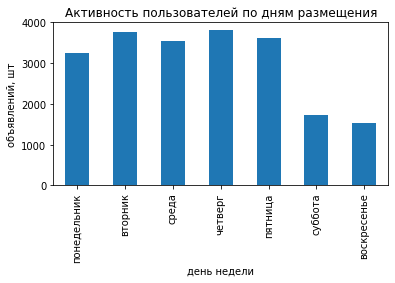

In [113]:
# Небезынтересно будет взглянуть и на общую активность по дням недели:
df_filtered['expo_weekday'].value_counts().sort_index().plot(kind='bar', figsize=(6,3)).set(title='Активность пользователей по дням размещения', xlabel='день недели', ylabel='объявлений, шт', xticklabels=weekday_ticks);

Кроме того, в выходные в целом размещается намного меньше объявлений, а самые активные дни - вторник и четверг.

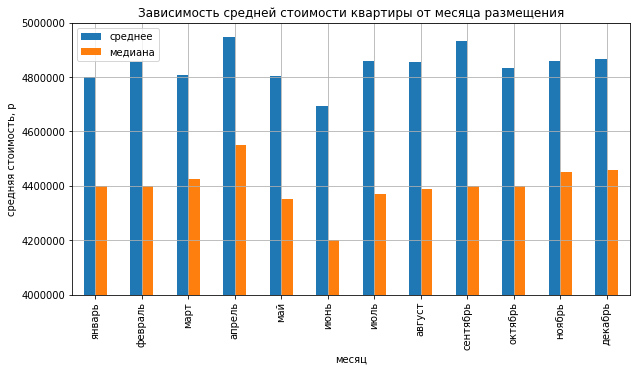

In [114]:
month_ticks=['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
month_pivot = df_filtered.pivot_table(index='expo_month', values='last_price', aggfunc=['mean','median'])
month_pivot.columns=['среднее', 'медиана']
month_pivot.plot(kind='bar',figsize=(10,5), grid=True, ylim=(4000000,5000000)).set(title='Зависимость средней стоимости квартиры от месяца размещения', xlabel='месяц', ylabel='средняя стоимость, р', xticklabels=month_ticks);

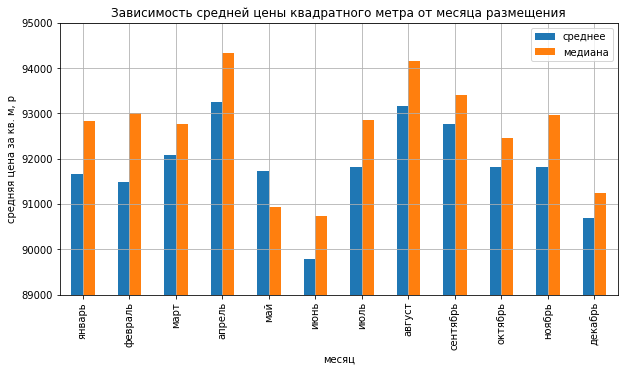

In [115]:
month_pivot_sqm = df_filtered.pivot_table(index='expo_month', values='price_per_sqm', aggfunc=['mean','median'])
month_pivot_sqm.columns=['среднее', 'медиана']
month_pivot_sqm.plot(kind='bar',figsize=(10,5), grid=True, ylim=(89000,95000)).set(title='Зависимость средней цены квадратного метра от месяца размещения', xlabel='месяц', ylabel='средняя цена за кв. м, р', xticklabels=month_ticks);

А вот сезонность на рынке явно присутствует: пик цен приходится на апрель и сентябрь (в случае цены за квадратный метр - на август). В мае и июне цены падают, кроме того, цена за квадратный метр снижается к концу года. Можно заключить, что в сезоны праздников и отпусков спрос падает, а с ним и рыночные цены.

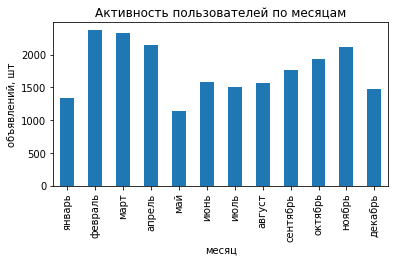

In [116]:
df_filtered['expo_month'].value_counts().sort_index().plot(kind='bar', figsize=(6,3)).set(title='Активность пользователей по месяцам', xlabel='месяц', ylabel='объявлений, шт', xticklabels=month_ticks);

По общему количеству размещений при этом лидируют февраль и март, январь, май и декабрь наименее активны.

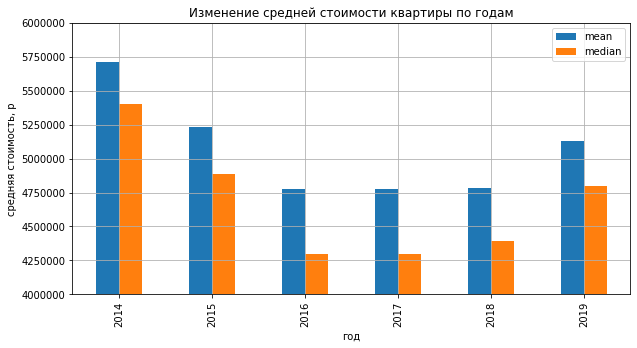

In [117]:
year_pivot = df_filtered.pivot_table(index='expo_year', values='last_price', aggfunc=['mean','median'])
year_pivot.columns=['mean', 'median']
year_pivot.plot(kind='bar',figsize=(10,5), grid=True, ylim=(4000000,6000000)).set(title='Изменение средней стоимости квартиры по годам', xlabel='год', ylabel='средняя стоимость, р');

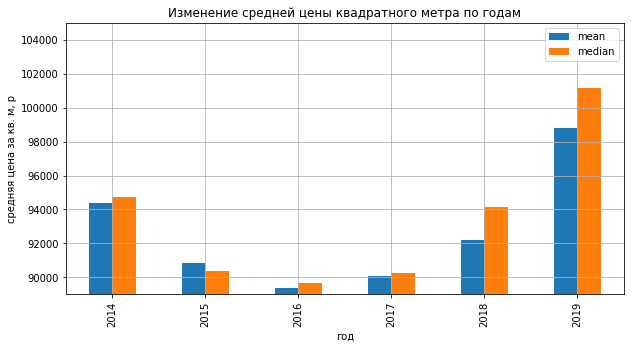

In [118]:
year_pivot_sqm = df_filtered.pivot_table(index='expo_year', values='price_per_sqm', aggfunc=['mean','median'])
year_pivot_sqm.columns=['mean', 'median']
year_pivot_sqm.plot(kind='bar',figsize=(10,5), grid=True, ylim=(89000,105000)).set(title='Изменение средней цены квадратного метра по годам', xlabel='год', ylabel='средняя цена за кв. м, р');

Налицо снижение средних цен с 2014 по 2016 год и сильный рост с 2017 по 2019. Это, конечно, обусловлено в первую очередь макроэкономическими факторами. Кроме того, отдельные категории квартир могли иметь динамику цен, отличную от средневзвешенной.

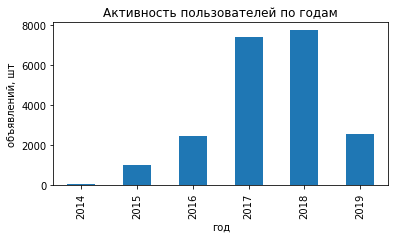

In [119]:
df_filtered['expo_year'].value_counts().sort_index().plot(kind='bar', figsize=(6,3)).set(title='Активность пользователей по годам', xlabel='год', ylabel='объявлений, шт');

Также стоит отметить, что статистика в 2014 и 2019 дана не за весь год, с оглядкой на это год от года объявлений размещается все больше, иногда в разы.

#### Вывод

С ростом *площади* цена объекта растет линейно (корреляция 0,73), цена за квадратный метр практически постоянна.

С ростом *числа комнат* цена также плавно растет (корреляция 0,47), однако цена за квадратный метр снижается (корреляция -0,22), и вновь начинает расти на отметке в 6 комнат. Момент слома тренда может изменяться в зависимости от выборки.

С *удалением от центра города* цена падает, как в целом (корреляция -0,34), так и за квадратный метр (корреляция -0,39). Разброс цен остается довольно большим.

Цена квартир *на первом и последнем этажах* как минимум на 10-15% ниже обычного (как в абсолютном исчислении, так и за метр), причем первый этаж дешевле последнего.

По *дням недели* самые высокие цены в объявлениях проставляли во вторник и среду, самые низкие - в субботу, скорее всего в ритме типичного рабочего цикла: в начале рабочей недели спрос может быть немного повышен. Влияние для недели, однако, невелико.

По *месяцам* ярко выражена цикличность сезонов: пик цен приходится на апрель и сентябрь (в случае цены за квадратный метр - на август). В мае и июне цены падают, кроме того, цена за квадратный метр снижается к концу года. Можно заключить, что в сезоны праздников и отпусков спрос падает, а с ним и рыночные цены. Колебания находятся в пределах 5%

По *годам* наблюдается снижение цен с 2014 по 2016 год и рост с 2017 по 2019, которые можно обосновать глобальными экономическими факторами, однако статистика не выглядит очень надежной - слишком неравна выборка по годам. Помимо того, многолетняя динамика цен должна сильно зависеть от категории недвижимости. Одна из таких категорий - недвижимость в центре крупного города, которую мы рассмотрим ниже.

### Стоимость жилья в популярных населенных пунктах

Сделаем очень краткий обзор 10 населенных пунктов, наиболее представленных в "чистых" данных:

In [120]:
# Соберем обзорную таблицу по названию населенного пункта и цене за метр:
locality_pivot = df_filtered.pivot_table(index='simplified_locality', values='price_per_sqm', aggfunc=['count','mean'])
# Отсортируем ее по количеству вхождений и выведем первые 10 строк:
locality_pivot = locality_pivot.sort_values(('count', 'price_per_sqm'), ascending = False).head(10)
locality_pivot

,count,mean
,price_per_sqm,price_per_sqm
simplified_locality,,
Санкт-Петербург,13570,104587.49
Мурино,590,86087.51
Кудрово,470,95152.10
Шушары,439,78666.18
Всеволожск,394,67222.43
Пушкин,338,100397.23
Колпино,335,75221.87
Парголово,326,90332.24


Самая высокая стоимость метра:

In [121]:
locality_pivot[locality_pivot[('mean', 'price_per_sqm')]==locality_pivot[('mean', 'price_per_sqm')].max()]

,count,mean
,price_per_sqm,price_per_sqm
simplified_locality,,
Санкт-Петербург,13570,104587.49


Самая низкая стоимость метра:

In [122]:
locality_pivot[locality_pivot[('mean', 'price_per_sqm')]==locality_pivot[('mean', 'price_per_sqm')].min()]

,count,mean
,price_per_sqm,price_per_sqm
simplified_locality,,
Выборг,231,58400.65


В топ-10 самые высокие цены на жилье в Санкт-Петербурге, самые низкие - в Выборге.

#### Вывод

Самый большой рынок недвижимости, конечно, в Санкт-Петербурге (больше половины всех объявлений), в топ-10 также входят Мурино, Кудрово, Шушары, Всеволожск, Колпино, Парголово, Пушкин, Гатчина и Выборг с сотнями предложений. Средняя цена квадратного метра в топ-10 выше всего в Санкт-Петербурге (104,6 тыс), ниже всего в Выборге (58,4 тыс)

### Сегментация: выделение городского центра

Сделаем срез по объектам, лежащим в черте Санкт-Петербурга. Строки без расстояний до центра придется дропнуть:

In [123]:
df_spb = df_filtered.query('simplified_locality == "Санкт-Петербург"').dropna(subset=['cityCenters_nearest'])

Создадим столбец с расстояниями до центра в километрах, с округлением до целого:

In [124]:
df_spb['center_km'] = (df_spb['cityCenters_nearest']/1000).round().astype(int)

Создадим обзорные таблицы по округленному расстоянию и ценам (общей стоимости и за квадратный метр):

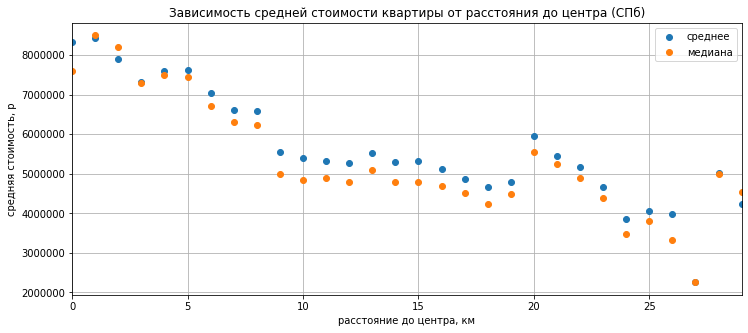

In [125]:
center_pivot = df_spb.pivot_table(index='center_km', values=['last_price'], aggfunc=['mean','median'])
center_pivot.columns=['среднее', 'медиана']
center_pivot.plot(style='o', figsize=(12,5), grid=True).set(title='Зависимость средней стоимости квартиры от расстояния до центра (СПб)', xlabel='расстояние до центра, км', ylabel='средняя стоимость, р');

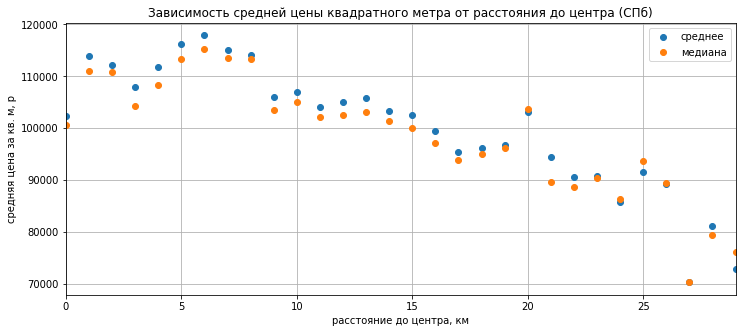

In [126]:
center_pivot_sqm = df_spb.pivot_table(index='center_km', values=['price_per_sqm'], aggfunc=['mean','median'])
center_pivot_sqm.columns=['среднее', 'медиана']
center_pivot_sqm.plot(style='o', figsize=(12,5), grid=True).set(title='Зависимость средней цены квадратного метра от расстояния до центра (СПб)', xlabel='расстояние до центра, км', ylabel='средняя цена за кв. м, р');

#### Вывод

В обоих случаях мы видим разрыв в ценах после отметки 8 км - порядка миллиона в абсолютных величинах и 100 тыс. за квадратный метр.

Эти 8 км мы и примем за радиус центральной зоны.

### Сегментация: исследование центральной зоны

Сделаем срез городского центра:

In [127]:
df_center = df_spb.query('center_km <= 8')
len(df_center)

2620

Для краткости мы не включили в этот раздел некоторые сравнительные графики по данным среза из городской черты, если они следовали тенденциям общей выборки, рассмотренным выше.

#### Высота потолков

count    2620.00
mean        2.89
std         0.32
min         2.40
25%         2.65
50%         2.82
75%         3.00
max         5.80
Name: ceiling_height, dtype: float64

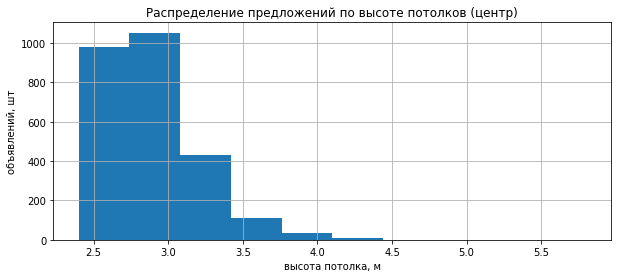

In [128]:
df_center['ceiling_height'].hist(figsize=(10,4)).set(title='Распределение предложений по высоте потолков (центр)', xlabel='высота потолка, м', ylabel='объявлений, шт');
df_center['ceiling_height'].describe()

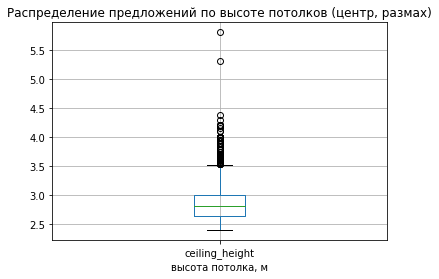

In [129]:
df_center['ceiling_height'].plot(kind='box', grid=True).set(title='Распределение предложений по высоте потолков (центр, размах)', xlabel='высота потолка, м');

**Средний потолок в центре значительно выше обычного**: более 2,8 м, почти 20 см разницы! Это больше, чем у 75% глобальной выборки. Значения до 3 м достаточно часты, статистически значимыми остаются значения в пределах 2,4-3,5 м, но есть и более высокие.

#### Разброс цен

count        2620
mean      7264952
std       2240952
min       1686000
25%       5599750
50%       7058312
75%       8900000
max      12000000
Name: last_price, dtype: object

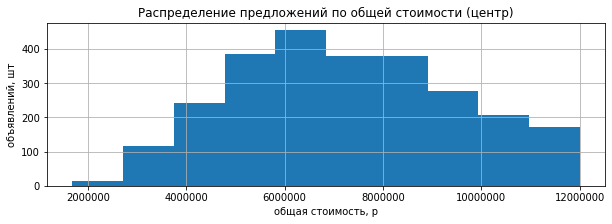

In [130]:
df_center['last_price'].hist(figsize=(10,3)).set(title='Распределение предложений по общей стоимости (центр)', xlabel='общая стоимость, р', ylabel='объявлений, шт');
df_center['last_price'].describe().apply("{:.0f}".format)

**Средняя цена квартиры в центре, конечно же, выше** - около 7,3 млн, а медианная - чуть выше 7 млн. Предложений ниже 3,5 млн немного, зато дорогих сколько угодно. Сравните с распределением цен в пределах городской черты:

count       13530
mean      5640941
std       2100770
min       1190000
25%       4050000
50%       5100000
75%       6800000
max      12000000
Name: last_price, dtype: object

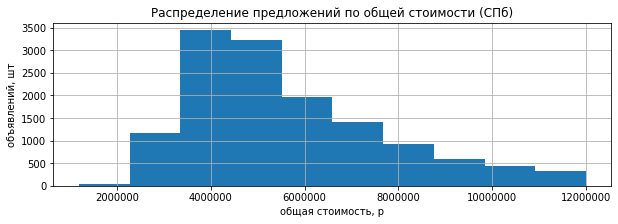

In [131]:
df_spb['last_price'].hist(figsize=(10,3)).set(title='Распределение предложений по общей стоимости (СПб)', xlabel='общая стоимость, р', ylabel='объявлений, шт');
df_spb['last_price'].describe().apply("{:.0f}".format)

Цены в среднем по городу ниже на 1,5-2 млн!

count      2620
mean     114052
std       23625
min       26250
25%       95745
50%      111441
75%      131202
max      169960
Name: price_per_sqm, dtype: object

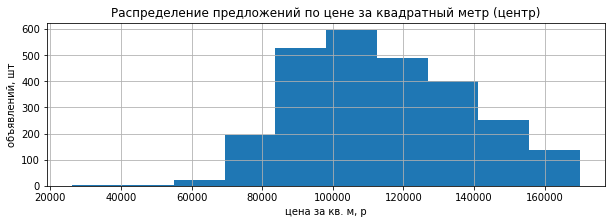

In [132]:
df_center['price_per_sqm'].hist(figsize=(10,3)).set(title='Распределение предложений по цене за квадратный метр (центр)', xlabel='цена за кв. м, р', ylabel='объявлений, шт');
df_center['price_per_sqm'].describe().apply("{:.0f}".format)

Средняя цена за квадратный метр превышает 114000, медианная - 111000, на 10% выше, чем в среднем по городу:

count     13530
mean     104540
std       20812
min       24440
25%       89590
50%      101778
75%      117072
max      170000
Name: price_per_sqm, dtype: object

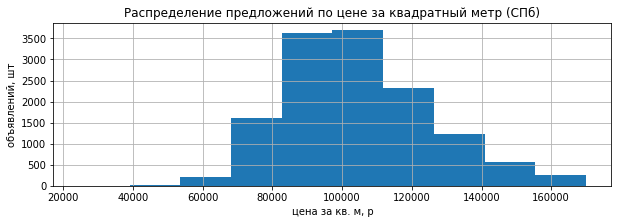

In [133]:
df_spb['price_per_sqm'].hist(figsize=(10,3)).set(title='Распределение предложений по цене за квадратный метр (СПб)', xlabel='цена за кв. м, р', ylabel='объявлений, шт');
df_spb['price_per_sqm'].describe().apply("{:.0f}".format)

#### Общая площадь

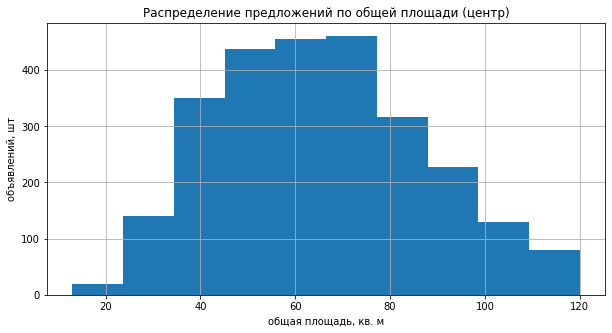

In [134]:
df_center['total_area'].hist(figsize=(10,5)).set(title='Распределение предложений по общей площади (центр)', xlabel='общая площадь, кв. м', ylabel='объявлений, шт');

count    2620.00
mean       65.48
std        21.46
min        13.00
25%        48.00
50%        64.20
75%        80.00
max       120.00
Name: total_area, dtype: float64

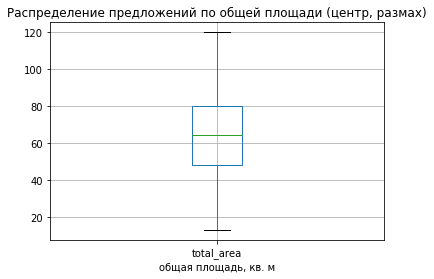

In [135]:
df_center['total_area'].plot(kind='box', grid=True).set(title='Распределение предложений по общей площади (центр, размах)', xlabel='общая площадь, кв. м');
df_center['total_area'].describe()

**Средняя, а особенно медианная площадь в центре выше, чем в общей выборке** - около 65 кв. м. Половина предложений лежит в диапазоне 48-80 м. Есть ли особенности ценообразования в зависимости от площади?

0.770830633257766

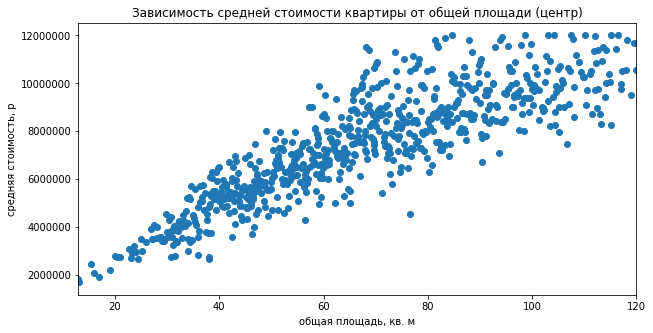

In [136]:
center_area_pivot = df_center.pivot_table(index='total_area', values='last_price')
center_area_pivot.plot(style='o', figsize=(10,5), legend=False).set(title='Зависимость средней стоимости квартиры от общей площади (центр)', xlabel='общая площадь, кв. м', ylabel='средняя стоимость, р');
df_center['total_area'].corr(df_center['last_price'])

-0.4004793360057679

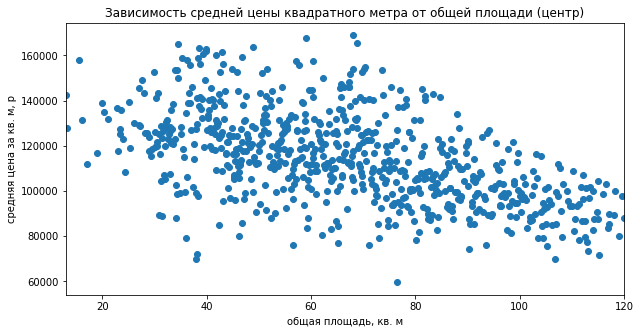

In [137]:
center_area_pivot_sqm = df_center.pivot_table(index='total_area', values='price_per_sqm')
center_area_pivot_sqm.plot(style='o', figsize=(10,5), legend=False).set(title='Зависимость средней цены квадратного метра от общей площади (центр)', xlabel='общая площадь, кв. м', ylabel='средняя цена за кв. м, р');
df_center['total_area'].corr(df_center['price_per_sqm'])

Зависимость средней цены объекта от площади выражена даже сильнее, чем в глобальной выборке (корреляция 0,77). А вот **цена квадратного метра показывает совсем другую динамику: с увеличением площади плавно снижается** (корреляция -0,4)!

А что по всему городу?

-0.1785360147195788

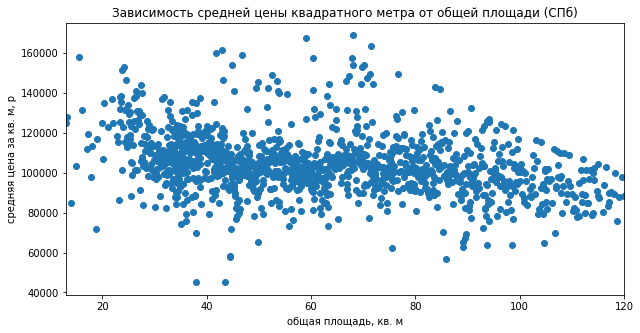

In [138]:
spb_area_pivot_sqm = df_spb.pivot_table(index='total_area', values='price_per_sqm')
spb_area_pivot_sqm.plot(style='o', figsize=(10,5), legend=False).set(title='Зависимость средней цены квадратного метра от общей площади (СПб)', xlabel='общая площадь, кв. м', ylabel='средняя цена за кв. м, р');
df_spb['total_area'].corr(df_spb['price_per_sqm'])

В черте города тенденция тоже уже заметна, но далеко не так сильна (корреляция -0,18).

#### Количество комнат

Посмотрим, насколько число комнат в центре отличается от такового по городу:

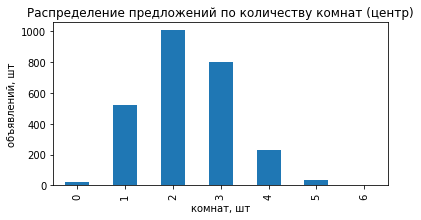

In [139]:
df_center['rooms'].value_counts().sort_index().plot(kind='bar', figsize=(6,3)).set(title='Распределение предложений по количеству комнат (центр)', xlabel='комнат, шт', ylabel='объявлений, шт');

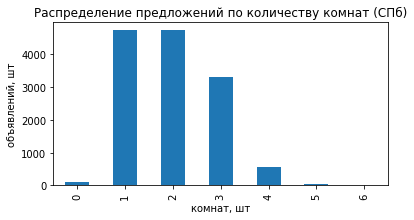

In [140]:
df_spb['rooms'].value_counts().sort_index().plot(kind='bar', figsize=(6,3)).set(title='Распределение предложений по количеству комнат (СПб)', xlabel='комнат, шт', ylabel='объявлений, шт');

Больше всего двухкомнатных квартир, но **в центре, в отличие от окраин, трехкомнатные квартиры довлеют над однокомнатными. Доля предложений с большим числом комнат также выше.**

Рассмотрим зависимость цены от этого параметра:

0.5082845220850476

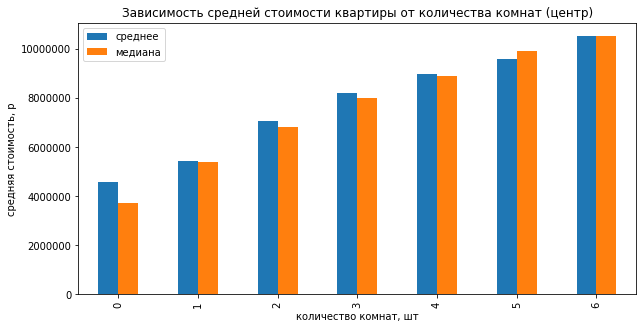

In [141]:
center_room_pivot = df_center.pivot_table(index='rooms', values='last_price', aggfunc=['mean','median'])
center_room_pivot.columns=['среднее', 'медиана']
center_room_pivot.plot(kind='bar',figsize=(10,5)).set(title='Зависимость средней стоимости квартиры от количества комнат (центр)', xlabel='количество комнат, шт', ylabel='средняя стоимость, р');
df_center['rooms'].corr(df_center['last_price'])

-0.47556461633115316

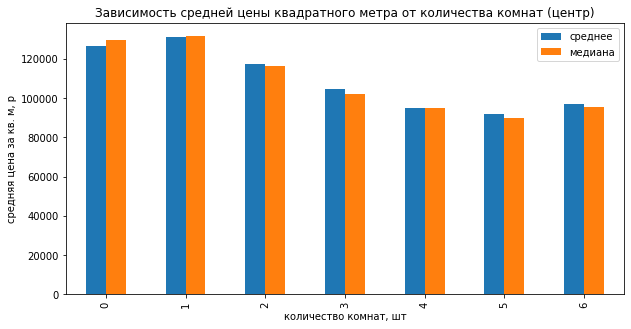

In [142]:
center_room_pivot_sqm = df_center.pivot_table(index='rooms', values='price_per_sqm', aggfunc=['mean','median'])
center_room_pivot_sqm.columns=['среднее', 'медиана']
center_room_pivot_sqm.plot(kind='bar',figsize=(10,5)).set(title='Зависимость средней цены квадратного метра от количества комнат (центр)', xlabel='количество комнат, шт', ylabel='средняя цена за кв. м, р');
df_center['rooms'].corr(df_center['price_per_sqm'])

Средняя цена с ростом количества комнат растет так же, как и везде. Тенденция снижения цены за метр с ростом числа комнат (до 5) также выражена сильнее, хотя "бескомнатные" квартиры **(студии и открытой планировки) оказываются в этом плане дешевле, чем в целом по выборке.**

-0.35929104685445673

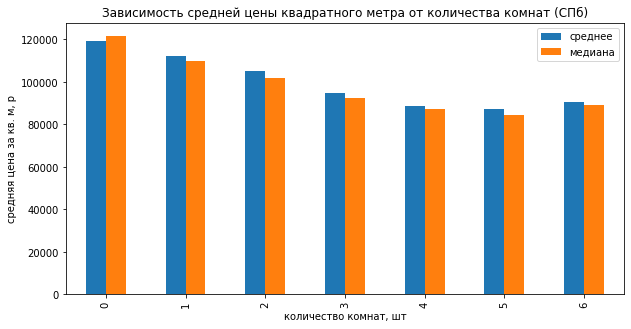

In [143]:
spb_room_pivot_sqm = df_spb.pivot_table(index='rooms', values='price_per_sqm', aggfunc=['mean','median'])
spb_room_pivot_sqm.columns=['среднее', 'медиана']
spb_room_pivot_sqm.plot(kind='bar',figsize=(10,5)).set(title='Зависимость средней цены квадратного метра от количества комнат (СПб)', xlabel='количество комнат, шт', ylabel='средняя цена за кв. м, р');
df_spb['rooms'].corr(df_spb['price_per_sqm'])

В целом же в черте города зависимость повторяет глобальную, но выражена сильнее (корреляция -0,36).

#### Удаленность от центра

-0.20030671475105433

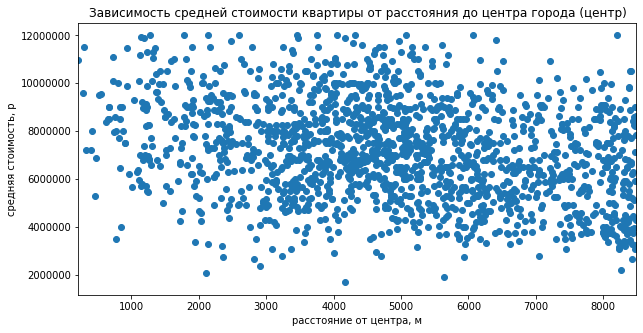

In [144]:
center_distance_pivot = df_center.pivot_table(index='cityCenters_nearest', values='last_price')
center_distance_pivot.plot(style='o', figsize=(10,5), legend=False).set(title='Зависимость средней стоимости квартиры от расстояния до центра города (центр)', xlabel='расстояние от центра, м', ylabel='средняя стоимость, р');
df_center['cityCenters_nearest'].corr(df_center['last_price'])

Разброс по-прежнему велик даже при усреднении, но тем не менее и внутри центральной зоны зависимость цены от расстояния прослеживается (корреляция -0,2).

0.06503498157292528

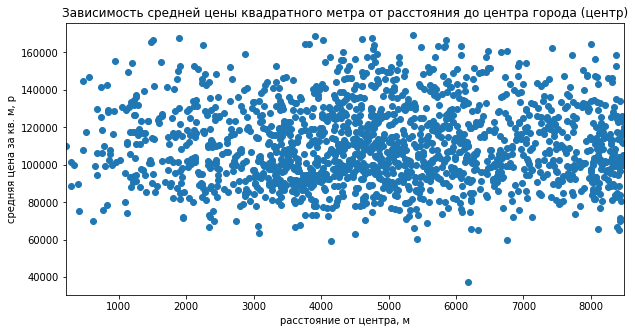

In [145]:
center_distance_pivot_sqm = df_center.pivot_table(index='cityCenters_nearest', values='price_per_sqm')
center_distance_pivot_sqm.plot(style='o', figsize=(10,5), legend=False).set(title='Зависимость средней цены квадратного метра от расстояния до центра города (центр)', xlabel='расстояние от центра, м', ylabel='средняя цена за кв. м, р');
df_center['cityCenters_nearest'].corr(df_center['price_per_sqm'])

**Цена же квадратного метра в центральной зоне практически стабильна**. Можно заключить, что **в самом центре концентрируются более крупные объекты** (в старом фонде таких действительно много).

-0.26669954657912437

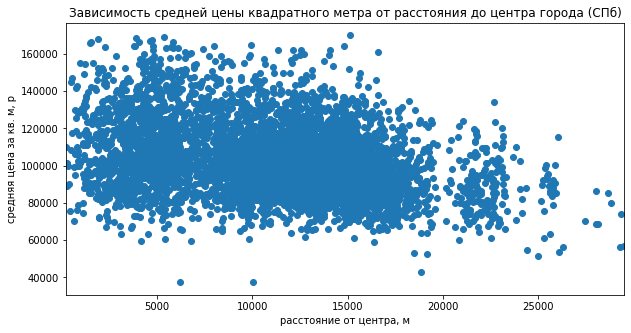

In [146]:
spb_distance_pivot_sqm = df_spb.pivot_table(index='cityCenters_nearest', values='price_per_sqm')
spb_distance_pivot_sqm.plot(style='o', figsize=(10,5), legend=False).set(title='Зависимость средней цены квадратного метра от расстояния до центра города (СПб)', xlabel='расстояние от центра, м', ylabel='средняя цена за кв. м, р');
df_spb['cityCenters_nearest'].corr(df_spb['price_per_sqm'])

В среднем по городу же цена квадратного метра следует общей тенденции: с удалением падает (корреляция -0,27).

#### Этаж

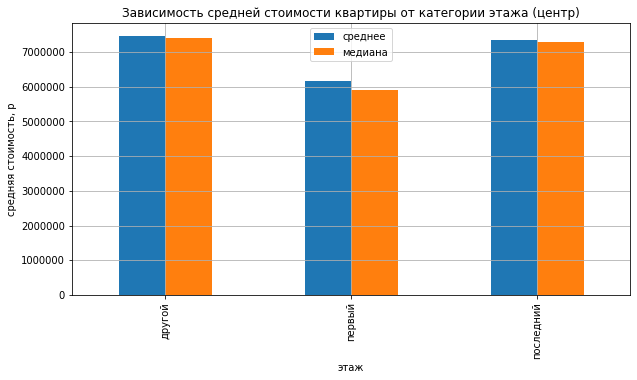

In [147]:
center_floor_pivot = df_center.pivot_table(index='floor_category', values='last_price', aggfunc=['mean','median'])
center_floor_pivot.columns=['среднее', 'медиана']
center_floor_pivot.plot(kind='bar',figsize=(10,5), grid=True).set(title='Зависимость средней стоимости квартиры от категории этажа (центр)', xlabel='этаж', ylabel='средняя стоимость, р');

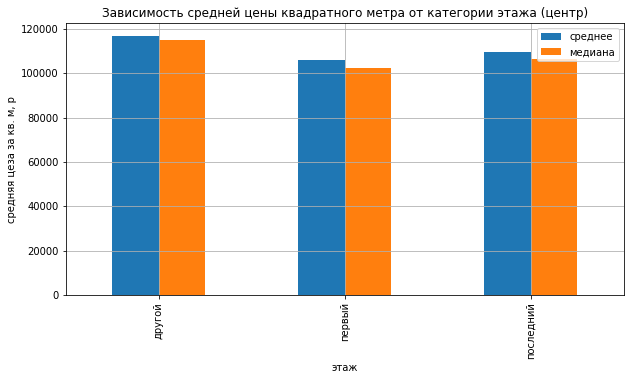

In [148]:
center_floor_pivot_sqm = df_center.pivot_table(index='floor_category', values='price_per_sqm', aggfunc=['mean','median'])
center_floor_pivot_sqm.columns=['среднее', 'медиана']
center_floor_pivot_sqm.plot(kind='bar',figsize=(10,5), grid=True).set(title='Зависимость средней цены квадратного метра от категории этажа (центр)', xlabel='этаж', ylabel='средняя цеза за кв. м, р');

Никаких сюрпризов - тенденции те же, что и в общей выборке. Первый и последний этажи дешевле других, но последний все же чуть дороже. Разве что в абсолютных цифрах последний этаж уже почти догоняет норму.

#### Дата размещения

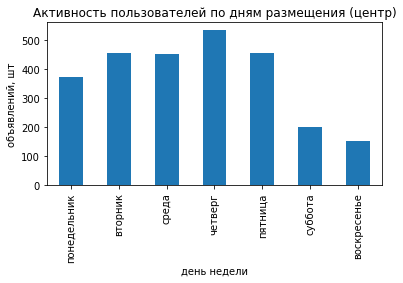

In [149]:
df_center['expo_weekday'].value_counts().sort_index().plot(kind='bar', figsize=(6,3)).set(title='Активность пользователей по дням размещения (центр)', xlabel='день недели', ylabel='объявлений, шт', xticklabels=weekday_ticks);

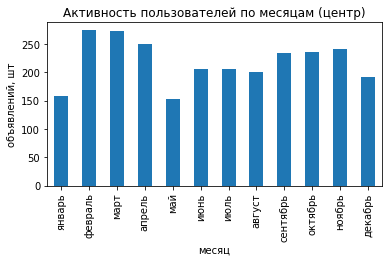

In [150]:
df_center['expo_month'].value_counts().sort_index().plot(kind='bar', figsize=(6,3)).set(title='Активность пользователей по месяцам (центр)', xlabel='месяц', ylabel='объявлений, шт', xticklabels=month_ticks);

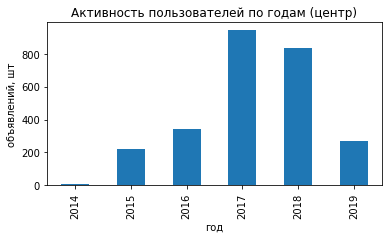

In [151]:
df_center['expo_year'].value_counts().sort_index().plot(kind='bar', figsize=(6,3)).set(title='Активность пользователей по годам (центр)', xlabel='год', ylabel='объявлений, шт');

Цикл активности размещений по дням недели и месяцам такой же, как и в целом. А вот 2018 год продемонстривал небольшой спад активности, в то время как глобально наблюдался некоторый рост. По всему городу активность была выше, но все же чуть ниже, чем в 2017:

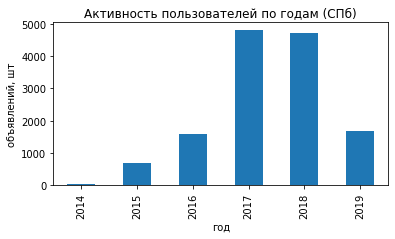

In [152]:
df_spb['expo_year'].value_counts().sort_index().plot(kind='bar', figsize=(6,3)).set(title='Активность пользователей по годам (СПб)', xlabel='год', ylabel='объявлений, шт');

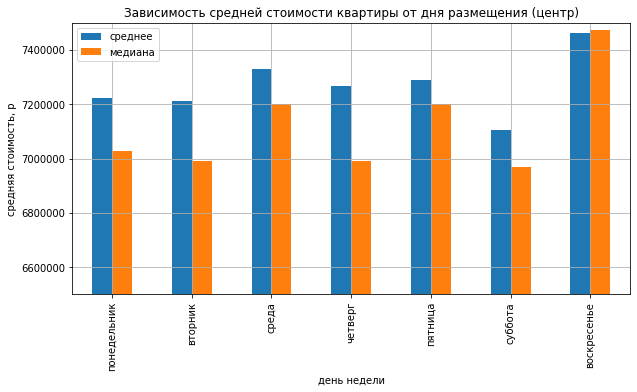

In [153]:
center_weekday_pivot = df_center.pivot_table(index='expo_weekday', values='last_price', aggfunc=['mean','median'])
center_weekday_pivot.columns=['среднее', 'медиана']
center_weekday_pivot.plot(kind='bar',figsize=(10,5), grid=True, ylim=(6500000,7500000)).set(title='Зависимость средней стоимости квартиры от дня размещения (центр)', xlabel='день недели', ylabel='средняя стоимость, р', xticklabels=weekday_ticks);

А вот самые дорогие предложения в центре размещались, неожиданно, в воскресенье! Далее идут среда и пятница. Суббота осталась самым "дешевым" днем.

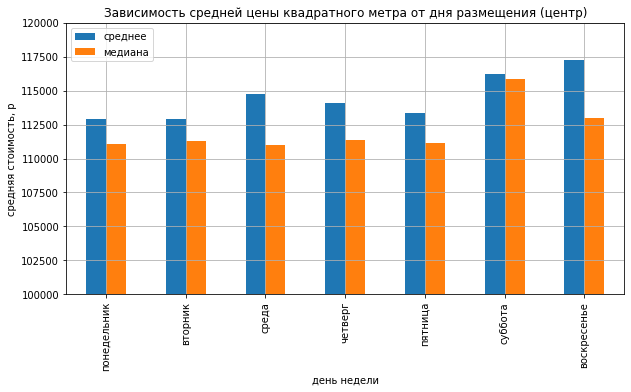

In [154]:
center_weekday_pivot_sqm = df_center.pivot_table(index='expo_weekday', values='price_per_sqm', aggfunc=['mean','median'])
center_weekday_pivot_sqm.columns=['среднее', 'медиана']
center_weekday_pivot_sqm.plot(kind='bar',figsize=(10,5), grid=True, ylim=(100000,120000)).set(title='Зависимость средней цены квадратного метра от дня размещения (центр)', xlabel='день недели', ylabel='средняя стоимость, р', xticklabels=weekday_ticks);

А по цене за квадратный метр суббота почти догнала воскресенье (а по медиане даже превзошла!) Среда, четверг и пятница идут следом, понедельник и вторник наименее "дорогие".

Поистине любопытная статитстика. Возможно, тем, кто может себе позволить квартиры в центре Питера, блюсти обычный рабочий график уже не нужно? А что в целом по городу?

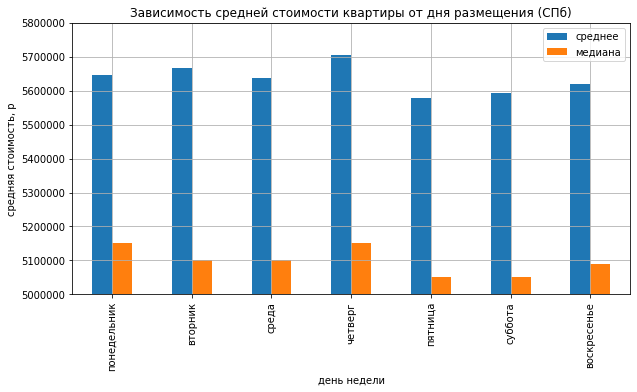

In [155]:
spb_weekday_pivot = df_spb.pivot_table(index='expo_weekday', values='last_price', aggfunc=['mean','median'])
spb_weekday_pivot.columns=['среднее', 'медиана']
spb_weekday_pivot.plot(kind='bar',figsize=(10,5), grid=True, ylim=(5000000,5800000)).set(title='Зависимость средней стоимости квартиры от дня размещения (СПб)', xlabel='день недели', ylabel='средняя стоимость, р', xticklabels=weekday_ticks);

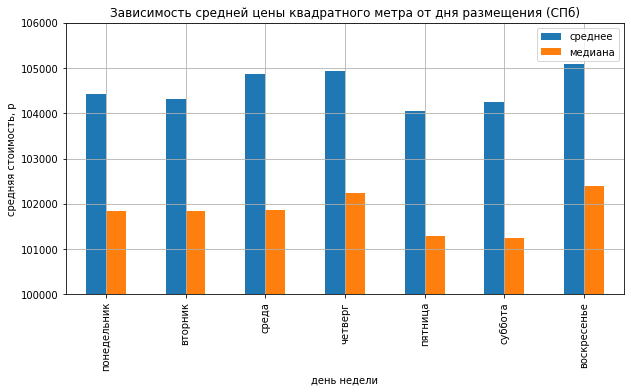

In [156]:
spb_weekday_pivot_sqm = df_spb.pivot_table(index='expo_weekday', values='price_per_sqm', aggfunc=['mean','median'])
spb_weekday_pivot_sqm.columns=['среднее', 'медиана']
spb_weekday_pivot_sqm.plot(kind='bar',figsize=(10,5), grid=True, ylim=(100000,106000)).set(title='Зависимость средней цены квадратного метра от дня размещения (СПб)', xlabel='день недели', ylabel='средняя стоимость, р', xticklabels=weekday_ticks);

А вот в целом в Санкт-Петербурге самые дорогие объявления размещались в чеверг (а по цене за кв. м - и в воскресенье). Самые низкие цены приходились на пятницу. Разница, впрочем, не превышает 1%.

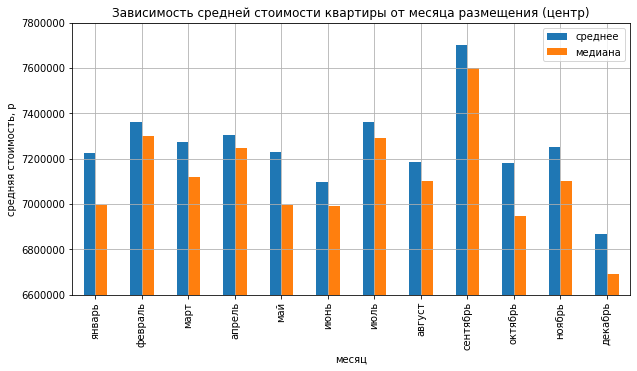

In [157]:
center_month_pivot = df_center.pivot_table(index='expo_month', values='last_price', aggfunc=['mean','median'])
center_month_pivot.columns=['среднее', 'медиана']
center_month_pivot.plot(kind='bar',figsize=(10,5), grid=True, ylim=(6600000,7800000)).set(title='Зависимость средней стоимости квартиры от месяца размещения (центр)', xlabel='месяц', ylabel='средняя стоимость, р', xticklabels=month_ticks);

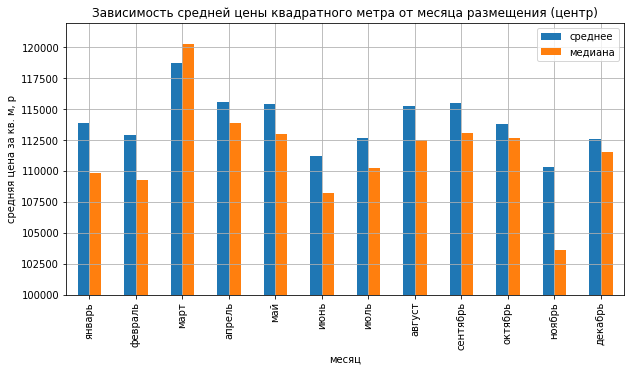

In [158]:
center_month_pivot_sqm = df_center.pivot_table(index='expo_month', values='price_per_sqm', aggfunc=['mean','median'])
center_month_pivot_sqm.columns=['среднее', 'медиана']
center_month_pivot_sqm.plot(kind='bar',figsize=(10,5), grid=True, ylim=(100000,122000)).set(title='Зависимость средней цены квадратного метра от месяца размещения (центр)', xlabel='месяц', ylabel='средняя цена за кв. м, р', xticklabels=month_ticks);

По месяцам самые дорогие предложения в абсолютных цифрах размещались в сентябре, а а самый серьезный спад приходился на июнь и декабрь. По цене за квадратный метр однозначно лидирует март, а в отстающих - июль и ноябрь. В целом сезонный цикл также соблюдается, но с небольшим сдвигом.

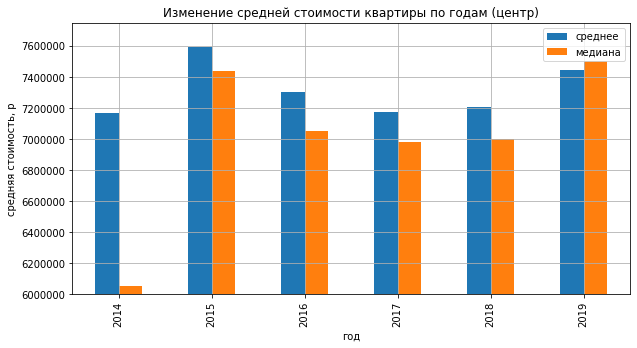

In [159]:
center_year_pivot = df_center.pivot_table(index='expo_year', values='last_price', aggfunc=['mean','median'])
center_year_pivot.columns=['среднее', 'медиана']
center_year_pivot.plot(kind='bar',figsize=(10,5), grid=True, ylim=(6000000,7750000)).set(title='Изменение средней стоимости квартиры по годам (центр)', xlabel='год', ylabel='средняя стоимость, р');

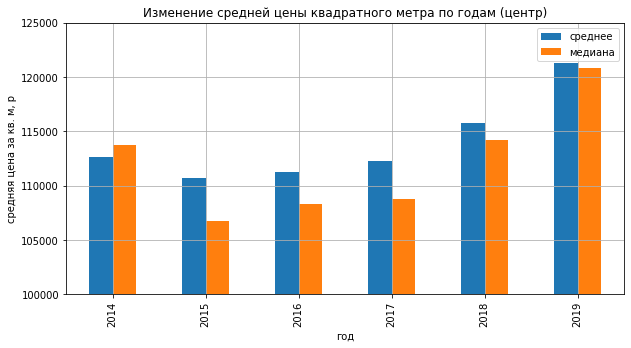

In [160]:
center_year_pivot_sqm = df_center.pivot_table(index='expo_year', values='price_per_sqm', aggfunc=['mean','median'])
center_year_pivot_sqm.columns=['среднее', 'медиана']
center_year_pivot_sqm.plot(kind='bar',figsize=(10,5), grid=True, ylim=(100000,125000)).set(title='Изменение средней цены квадратного метра по годам (центр)', xlabel='год', ylabel='средняя цена за кв. м, р');

2014 год демонстирует неоднозначную статистику, видимо, из-за слишком малой выборки:

In [161]:
print ('Предложений в центре в 2014 году:', len (df_center.query('expo_year == 2014')))

Предложений в центре в 2014 году: 11


В целом статистистика несколько иная, чем глобально: в абсолютном исчислении ценовое "дно" пришлось на 2017 год, а по цене за метр - на 2015. Можно заключить, что **в центральной зоне цена метра за последние годы стабильно растет**.

#### Вывод

*Высота потолков* в городском центре куда выше среднего - свыше 2,8 м, это даже больше, чем у 75% глобальной выборки. Большинство значений укладывается в диапаон 2,4-3,5 м. Разница неудивительна, в старых домах высокие потолки не редкость.

*Средние цены* также ожидаемо выше  - около 7,3 млн (чуть выше 7 млн по медиане), или 111 тыс. за квадратный метр (114 тыс. по медиане). Цены в выборке по всему городу ниже на 1,5-2 млн, а в выражении за квадратный метр разница составляет порядка 10%.

Средняя *площадь* в центре выше, чем в общей выборке - около 65 кв. м. Половина предложений лежит в диапазоне 48-80 м. Зависимость средней цены объекта от площади выражена даже сильнее, чем в глобальной выборке (корреляция 0,77). А вот цена квадратного метра отнюдь не постоянна: с увеличением площади снижается. В черте города этот эффект малозаметен, а центре выражен ярко - корреляция -0,4!

В центре, как и глобально, усредненная квартира двухкомнатная, но трехкомнатных квартир уже больше, чем однокомнатных. Доля предложений с б*о*льшим числом комнат также выше.
Тенденция роста цен с ростом количества комнат повторяет глобальную; то же можно сказать о тренде снижения цены за метр с ростом числа комнат (до 5), хотя квартиры-студии и квартиры открытой планировки несколько выбиваются из тренда (но возможно, это связано с относительно малой выборкой по ним).

Зависимость цены объекта от *расстояния* в центральной зоне сохраняется (корреляция -0,2), однако цена квадратного метра внутри нее, в отличие от общей выборки, стабильна и не зависит от расстояния. Можно заключить, что ближе к центру концентрируются более крупные объекты, в старых домах больших квартир действительно много.

Квартиры на *первом и последнем этажах* следуют общей ценовой закономерности: первый этаж дешевле всех, последний подороже, но все же дешевле остальных; хотя в абсолютном выражении последний этаж уже почти нагоняет норму, приближаясь к средней цене в 7 млн против 6 млн у первого. По цене за кв. м шаг между всеми тремя категориями составляет порядка 10 тыс. за квадрат.

Статистика по *дням недели* совсем не похожа на глобальную: самые дорогие предложения в центре размещают в воскресенье, среду и пятницу. Суббота осталась самой "дешевой". По цене за квадратный метр плюс к этому выделяются суббота и четверг, а понедельник и вторник наименее "дорогие". Срез по городской черте показывает неоднозначные результаты, по-видимому, в результате смешения разных трендов.
По *месяцам* схожая картина: сентябрь лидирует по дорогим предложениям, июнь и декабрь характеризуются спадом. По цене за квадратный метр лидирует март, спад в июле и ноябре. В целом сезонный цикл также соблюдается, но сдвинут по сравнению с глобальным. 
Похоже, в центре города люди живут в ином деловом ритме по сравнению с окраинами.

А вот по *годам* статистистика в этом сегменте недвижимости совсем не похожа на глобальную: в абсолютном исчислении самые низкие цены были в 2017 году, а цена за квадратный метр после 2015 года стабильно растет.

## Общий вывод

Мы проанализировали данные о рынке недвижимости и можем сделать следующие выводы:

Средняя квартира на рынке двухкомнатная (хотя больше всего однокомнатных квартир), площадью около 60 кв. м (52 по медиане), с потолками высотой 2,65-2,7 м и ценой около 6,5 млн (4,65 по медиане). Средний срок продажи около 196 дней, медианный 114 дней.

Аномальными и нетипичными показателями можно считать:
- площадь свыше 120 кв. м;
- число комнат свыше 6;
- цену свыше 12 млн;
- цену за квадратный метр свыше 170000 или ниже 20000;
- срок продажи длиннее 600 дней

Больше половины всех объявлений на рынке предлагают объекты в черте Санкт-Петербурга. В топ-10 по объему предложений также входят Мурино, Кудрово, Шушары, Всеволожск, Колпино, Парголово, Пушкин, Гатчина и Выборг с сотнями предложений. Средняя цена квадратного метра в популярных населенных пунктах выше всего в Санкт-Петербурге (104,6 тыс), ниже всего в Выборге (58,4 тыс).

В **общей выборке** выявлены следующие закономерности ценообразования:
- Полная стоимость квартиры растет линейно с ростом площади (корреляция 0,73), цена за квадратный метр же от площади практически не зависит.
- С ростом числа комнат полная стоимость также растет (корреляция 0,47), однако цена за квадратный метр снижается (корреляция -0,22), и вновь начинает расти на отметке в 6 комнат.
- С удалением от центра города цена падает, как в целом (корреляция -0,34), так и за квадратный метр (корреляция -0,39). Разброс цен остается широким.
- Цена квартир на первом и последнем этажах как минимум на 10-15% ниже обычного, причем первый этаж дешевле последнего.
- Самые высокие цены в объявлениях проставляли во вторник и среду, самые низкие - в субботу, но колебания незначительны.
- Выражена цикличность сезонов: пик цен приходится на апрель и сентябрь (в случае цены за квадратный метр - на август). В мае и июне цены падают, кроме того, цена за квадратный метр снижается к концу года. Колебания находятся в пределах 5%
- В среднем по рынку наблюдается снижение цен с 2014 по 2016 год и рост с 2017 по 2019.

В **сегменте недвижимости в центре Санкт-Петербурга** (мы выделили центральную зону радиусом 8 км, в которой средняя цена объекта растет скачкообразно - порядка миллиона в абсолютных величинах и 100 тыс. за квадратный метр) закономерности несколько иные.

Большинство особенностей сегмента объясняются параметрами домов старого фонда:
- Высота потолков в городском центре куда выше, чем в общей выборке и в среднем превышает 2,8 м.
- Средние цены также ожидаемо выше  - около 7,3 млн (7 млн по медиане), или 111 тыс. за квадратный метр (114 тыс. по медиане). Цены в выборке по всему городу ниже на 1,5-2 млн, а в выражении за квадратный метр разница составляет порядка 10%.
- Средняя площадь квартиры в центре опять же выше, чем в общей выборке - около 65 кв. м. Зависимость средней цены объекта от площади выражена даже сильнее (корреляция 0,77). А вот цена квадратного метра отнюдь не постоянна: с увеличением площади снижается. В черте города этот эффект малозаметен, а центре выражен ярко - корреляция -0,4!
- В центре, как и глобально, усредненная квартира двухкомнатная, но трехкомнатных квартир больше, чем однокомнатных. Доля предложений с б*о*льшим числом комнат также выше. Тенденции роста цен с ростом количества комнат и снижения цены за метр с ростом числа комнат (до 5) соответствуют глобальным.
- Зависимость цены объекта от расстояния в центральной зоне сохраняется (корреляция -0,2), однако цена квадратного метра внутри нее, в отличие от общей выборки, стабильна. Очевидно, ближе к центру концентрируются более крупные объекты.
- Квартиры на первом и последнем этажах следуют глобальной ценовой закономерности, по цене за кв. м шаг между всеми тремя категориями составляет порядка 10 тыс. за квадрат.

Есть и другие интересные наблюдения:
- Статистика по дням недели отличается от общей выборки: самые дорогие предложения в центре размещают в воскресенье, среду и пятницу, самые дешевые, как и глобально, - в субботу. По цене за квадратный метр понедельник и вторник отличаются снижением цены, суббота догоняет воскресенье, а четверг обходит пятницу. По месяцам лидирует по высоким ценам сентябрь, июнь и декабрь характеризуются спадом. По цене за квадратный метр лидирует март, спад в июле и ноябре. В целом сезонный цикл также соблюдается, но сдвинут по сравнению с глобальным. Похоже, в центре города люди живут в ином деловом ритме по сравнению с окраинами.
- Статистика по годам в выделенном сегменте особая: в абсолютном исчислении самые низкие цены были в 2017 году, а цена за квадратный метр после 2015 года стабильно растет.

### Рекомендации по заполнению данных:

- В выгрузке нет информации о результативности объявления: было ли оно снято по причине продажи или просто закрыто. Аномальное число закрытых объявлений в определенные дни, по-видимому, вызвано автоматическим снятием объявления по истечении срока.
- Весьма желательно валидировать ввод высоты потолка (например, значение не должно быть менее 2.0 или иметь двузначную целую часть), многие ошибочные значения в таблице явно вызваны ошибкой при вводе или проблемой с вводом/обработкой запятой/точки.
- Некоторые значения, например число этажей и картографические данные, можно было бы заполнять автоматически на основе адреса, это позволило бы избежать пропусков.
- Название населенного пункта желательно выбирать из списка, текущий вариант заполнения производит разнобой и дубликаты, тип населенного пункта в большинстве случаев не важен или даже вводит в заблуждение (Мурино, к примеру, с 2019 года - город).
- Необычное распределение значений в столбце с числом фотографий может указывать на баг при подсчете. Стоит уточнить этот момент.
- Даты размещения также имеют аномальную активность в определенные дни. В данном исследовании не используются эти данные, но неплохо бы прояснить этот вопрос с авторами выгрузки.